In [1]:
import os, sys, logging

import numpy as np
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from kcm import *  

In [2]:
probs = np.array([]) #np.arange(0.2, .8, 0.2)
 
for prob in probs:
    print("Probability: {}".format(prob))
    east_kcm = EastKCM(prob, 50, 200, 50000)
    trajectory = east_kcm.gen_trajectory()
    draw_trajectory(trajectory)

This is what we want to see (also a reference for the parameter ranges)

![goal.png](./goal1.png)

# One-spin FA Model


Probabilty of flip: 0.25; Probability of swap, s: 0.0
Activity: 0.407516666667
Probabilty of flip: 0.25; Probability of swap, s: 0.1
Activity: 0.410306666667
Probabilty of flip: 0.25; Probability of swap, s: 0.2
Activity: 0.409378333333
Probabilty of flip: 0.25; Probability of swap, s: 0.3
Activity: 0.396230833333
Probabilty of flip: 0.25; Probability of swap, s: 0.4
Activity: 0.376945833333
Probabilty of flip: 0.25; Probability of swap, s: 0.5
Activity: 0.343573333333
Probabilty of flip: 0.25; Probability of swap, s: 0.6
Activity: 0.299205833333
Probabilty of flip: 0.25; Probability of swap, s: 0.7
Activity: 0.244608333333
Probabilty of flip: 0.25; Probability of swap, s: 0.8
Activity: 0.168080833333
Probabilty of flip: 0.25; Probability of swap, s: 0.9
Activity: 0.0873675
Probabilty of flip: 0.25; Probability of swap, s: 1.0
Activity: 0.0
Probabilty of flip: 0.5; Probability of swap, s: 0.0
Activity: 0.4081
Probabilty of flip: 0.5; Probability of swap, s: 0.1
Activity: 0.409811666667

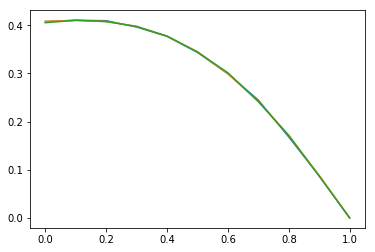

In [8]:
# p_swaps = np.array([1e-3, 1e-2, 1e-1, 0.5, 1.])
# p_flips = np.array([1e-3, 1e-2, 1e-1, 0.5, 1.])

p_swaps = np.arange(0,1.1,0.1)
p_flips = [0.25, 0.5, 0.75]

#logging.basicConfig(level=logging.INFO)
activities = np.zeros(p_swaps.size)

for p_flip in p_flips:
    for i, p_swap in enumerate(p_swaps):
        print("Probabilty of flip: {}; Probability of swap, s: {}".format(p_flip, p_swap))
        fa_kcm = OneSpinFAKCM(prob_transition=p_swap, prob_swap=p_swap, num_burnin_steps=0, num_sites=60, num_steps=200, coupling_energy=1.)
        trajectory = fa_kcm.gen_trajectory()
        tps = TransitionPathSampler(fa_kcm, fa_kcm.activity)
        activity =tps.mc_average(100, verbose=False)
        print("Activity: {}".format(activity))
        activities[i] = activity
        #draw_trajectory(trajectory)
        
    plt.plot(p_swaps, activities)

plt.show()

# Softened FA Model

Softening parameter, epsilon: 0.001; Biasing field, s: 0.001
Activity: 0.00738888888889


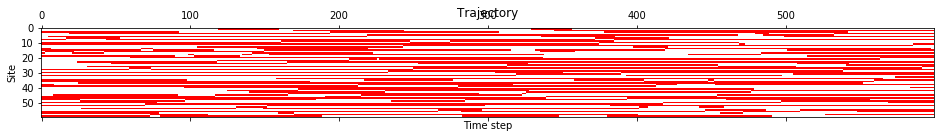

Softening parameter, epsilon: 0.001; Biasing field, s: 0.1
Activity: 0.00658333333333


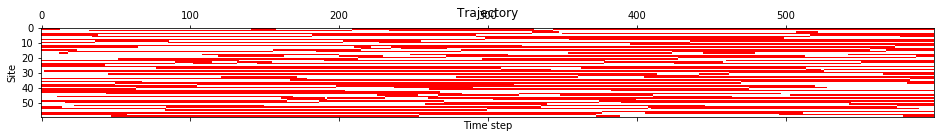

Softening parameter, epsilon: 0.001; Biasing field, s: 1.0
Activity: 0.00697222222222


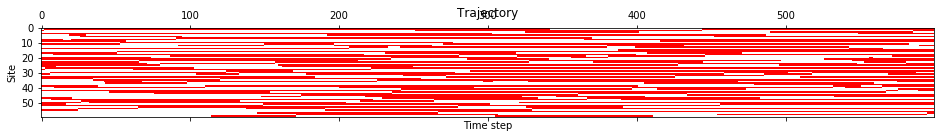

Softening parameter, epsilon: 0.001; Biasing field, s: 10.0
Activity: 0.00163888888889


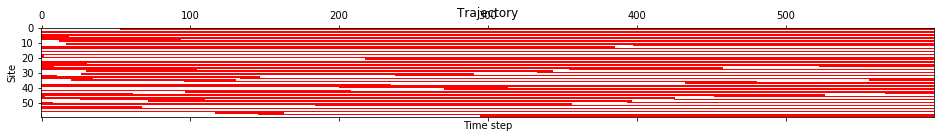

Softening parameter, epsilon: 0.001; Biasing field, s: 1000.0


kcm.py:214: RuntimeWarning: overflow encountered in exp
  return (1. - self.gamma + np.sqrt(np.square(1. - self.gamma) + 4. * np.exp(-s) * self.gamma)) / 2.


Activity: 0.00161111111111


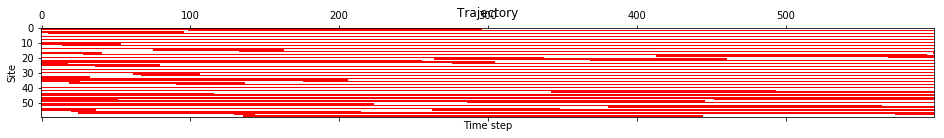

Softening parameter, epsilon: 0.1; Biasing field, s: 0.001
Activity: 0.00722222222222


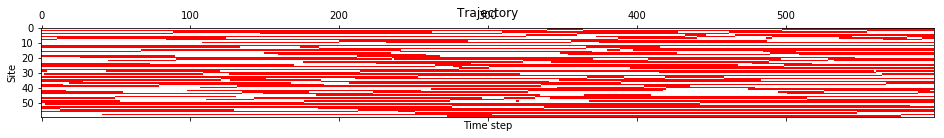

Softening parameter, epsilon: 0.1; Biasing field, s: 0.1
Activity: 0.00694444444444


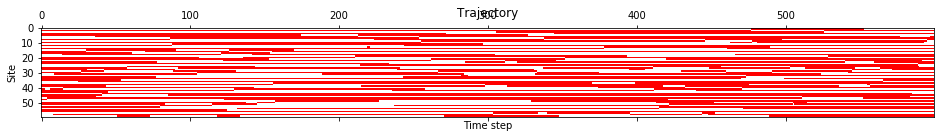

Softening parameter, epsilon: 0.1; Biasing field, s: 1.0
Activity: 0.00547222222222


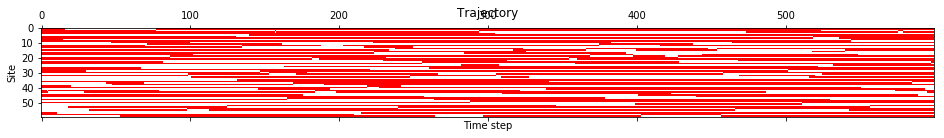

Softening parameter, epsilon: 0.1; Biasing field, s: 10.0
Activity: 0.00105555555556


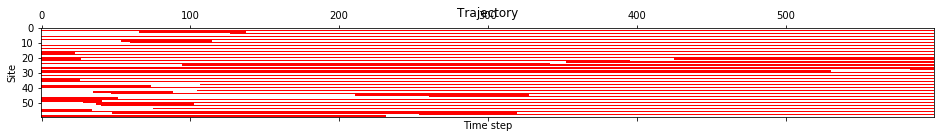

Softening parameter, epsilon: 0.1; Biasing field, s: 1000.0
Activity: 0.00138888888889


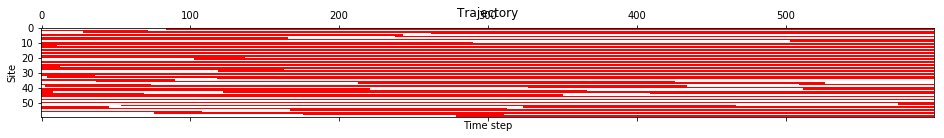

Softening parameter, epsilon: 1.0; Biasing field, s: 0.001
Activity: 0.00461111111111


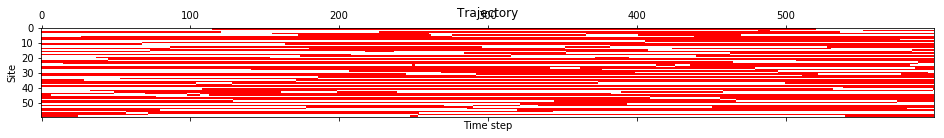

Softening parameter, epsilon: 1.0; Biasing field, s: 0.1
Activity: 0.00502777777778


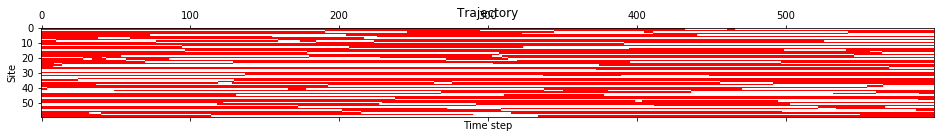

Softening parameter, epsilon: 1.0; Biasing field, s: 1.0
Activity: 0.00425


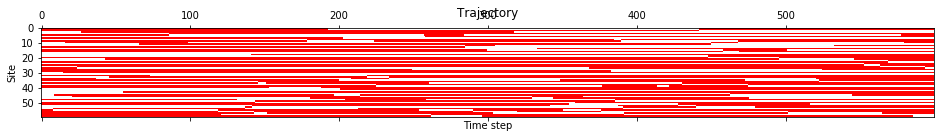

Softening parameter, epsilon: 1.0; Biasing field, s: 10.0
Activity: 0.00133333333333


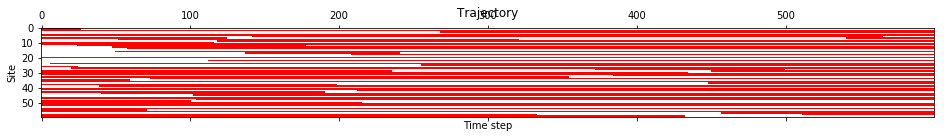

Softening parameter, epsilon: 1.0; Biasing field, s: 1000.0
Activity: 0.00113888888889


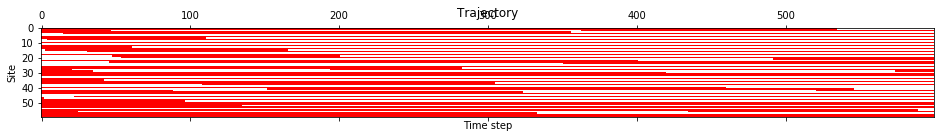

Softening parameter, epsilon: 10.0; Biasing field, s: 0.001
Activity: 0.000361111111111


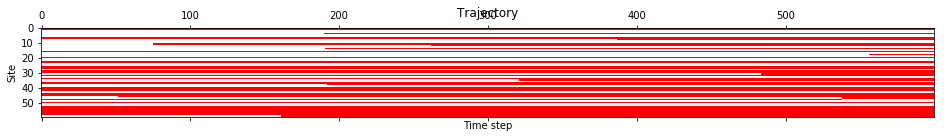

Softening parameter, epsilon: 10.0; Biasing field, s: 0.1
Activity: 0.000333333333333


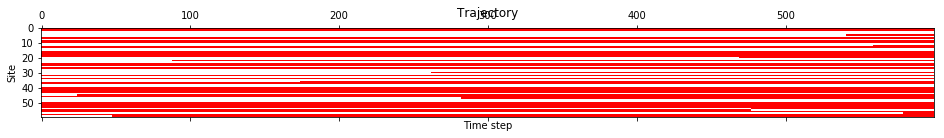

Softening parameter, epsilon: 10.0; Biasing field, s: 1.0
Activity: 0.000277777777778


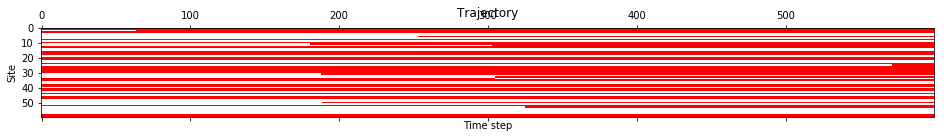

Softening parameter, epsilon: 10.0; Biasing field, s: 10.0
Activity: 0.000138888888889


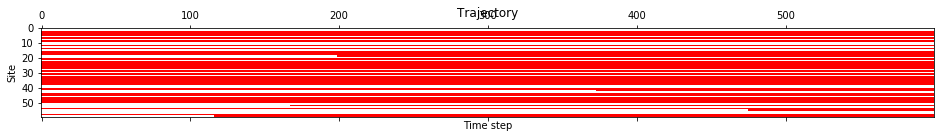

Softening parameter, epsilon: 10.0; Biasing field, s: 1000.0
Activity: 0.000111111111111


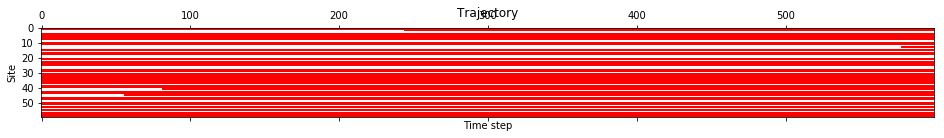

In [10]:
epsilons = np.array([1e-3, 1e-1, 1., 10.]) #np.array([1.9e-4, 6.3e-3,1.9e-2])
ss = np.array([1e-3, 1e-1, 1., 10., 1000.])

#logging.basicConfig(level=logging.INFO)

for eps in epsilons:
    for s in ss:
        print("Softening parameter, epsilon: {}; Biasing field, s: {}".format(eps, s))
        fa_kcm = SoftenedFA(gamma=0.25, s=-s, eps=eps, num_burnin_steps=0, num_sites=60, num_steps=600)
        trajectory = fa_kcm.gen_trajectory()
        tps.mc_average(100)
        print("Activity: {}".format(fa_kcm.activity(trajectory)))
        draw_trajectory(trajectory)

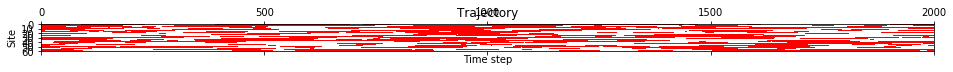

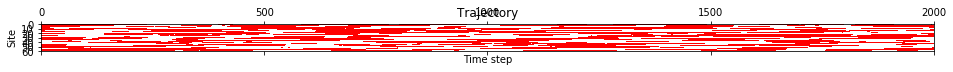

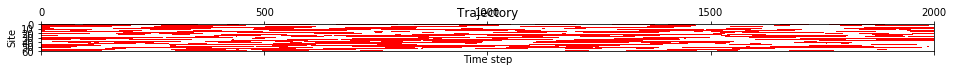

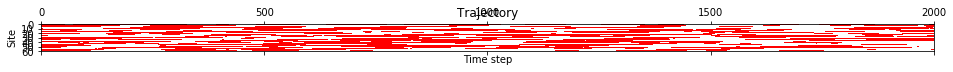

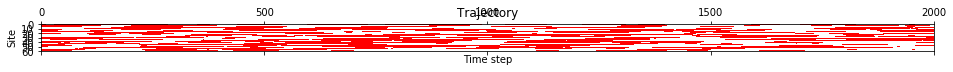

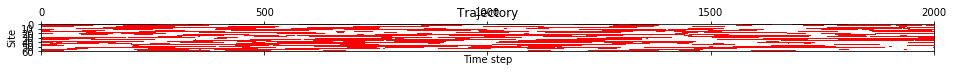

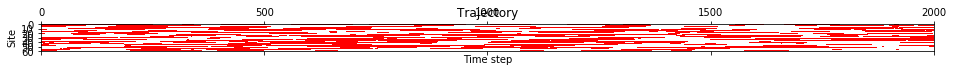

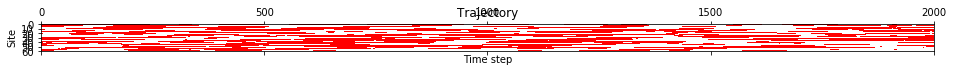

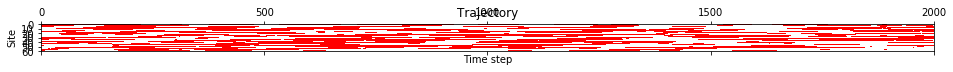

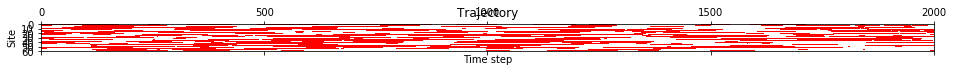

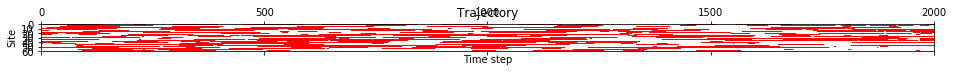

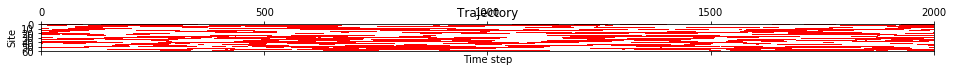

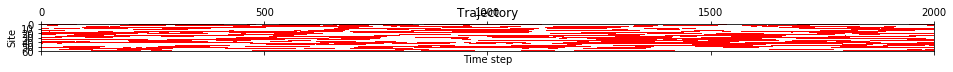

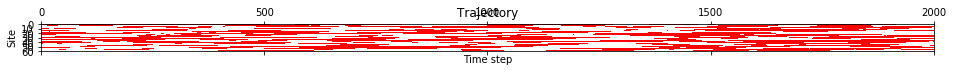

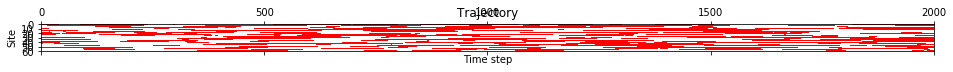

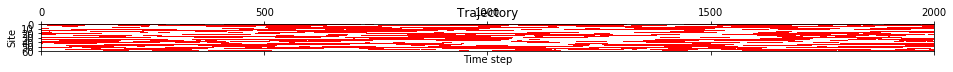

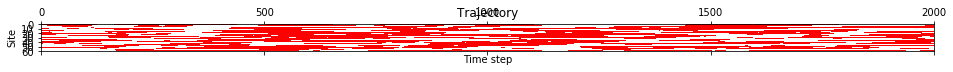

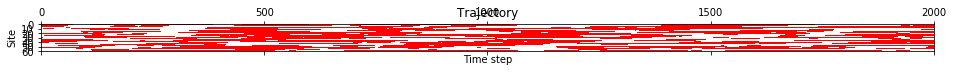

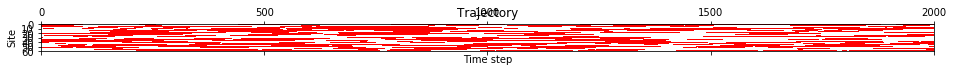

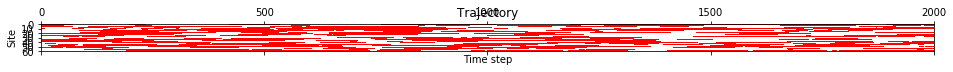

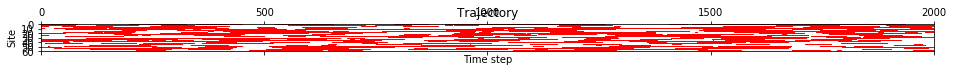

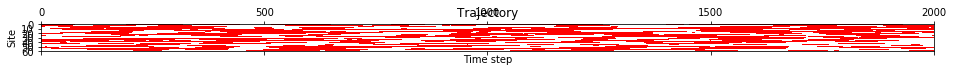

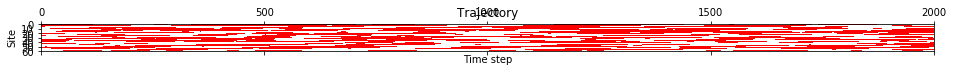

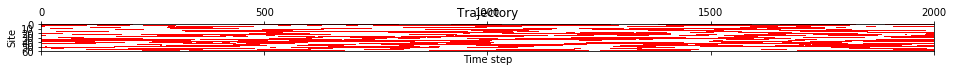

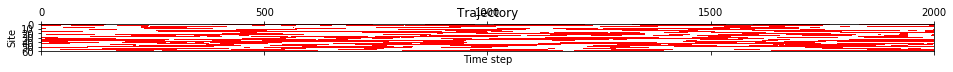

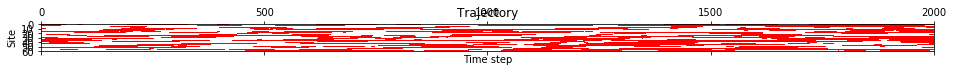

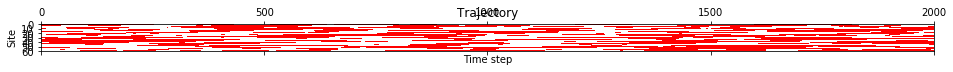

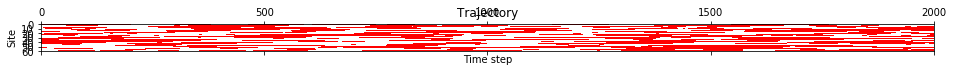

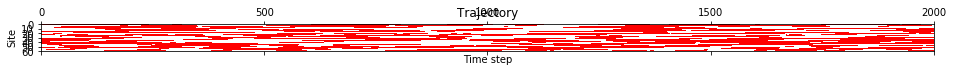

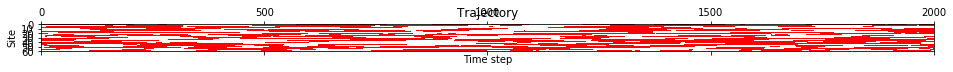

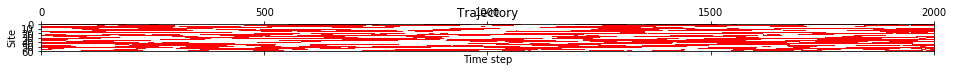

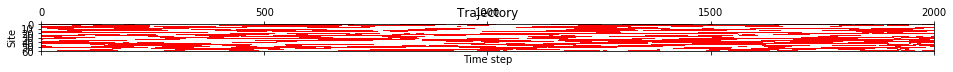

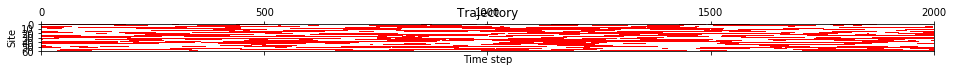

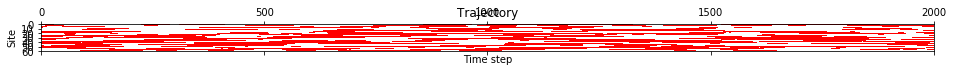

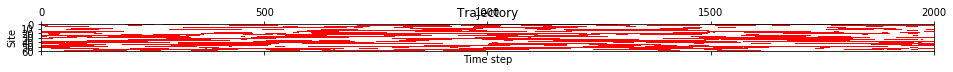

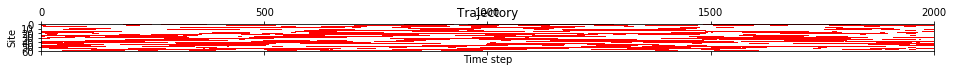

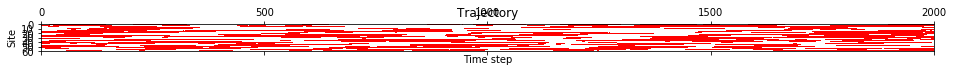

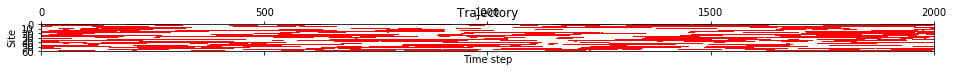

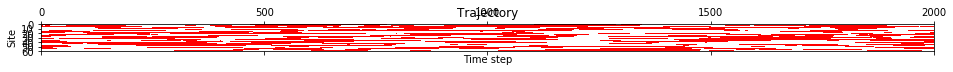

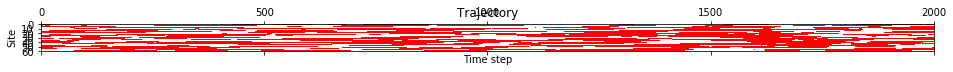

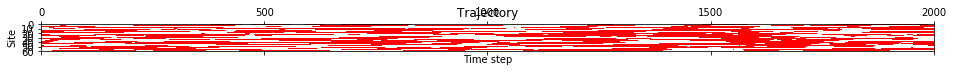

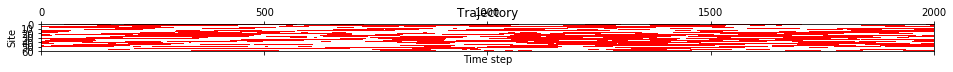

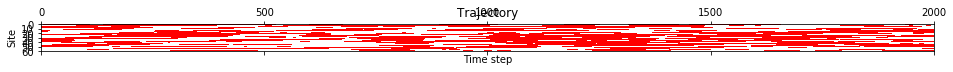

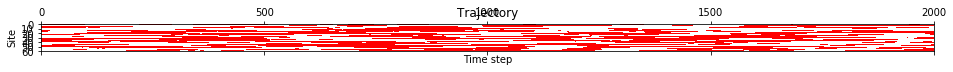

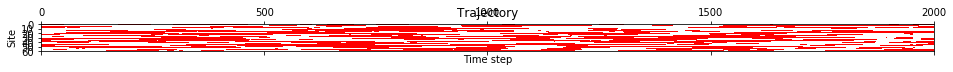

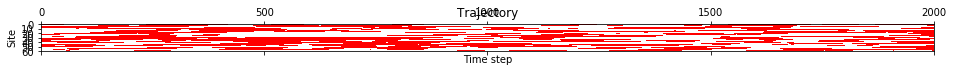

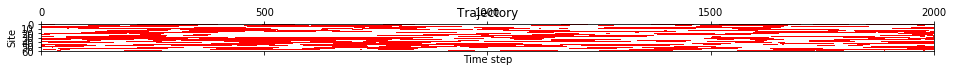

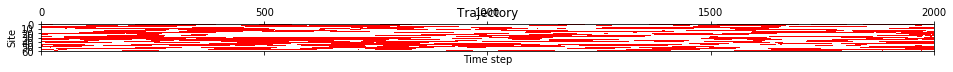

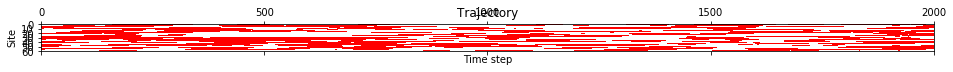

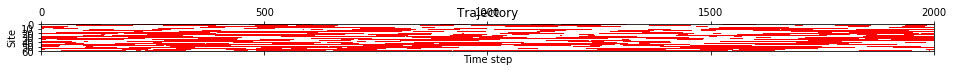

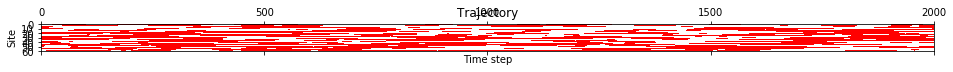

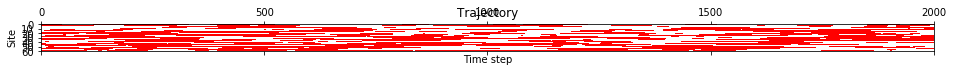

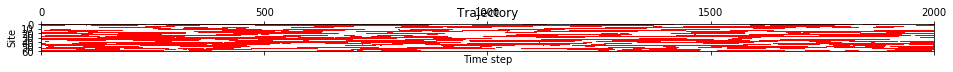

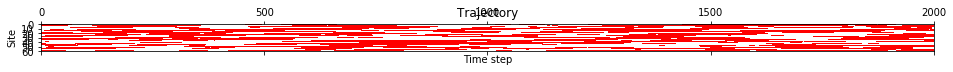

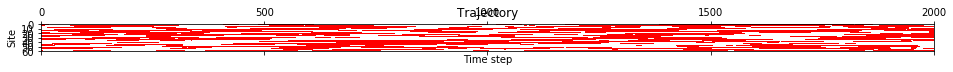

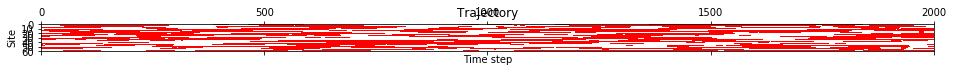

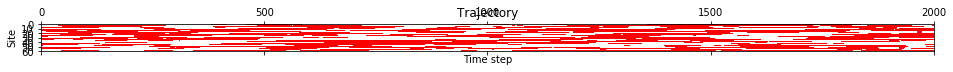

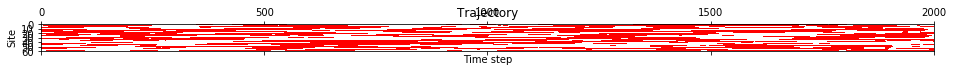

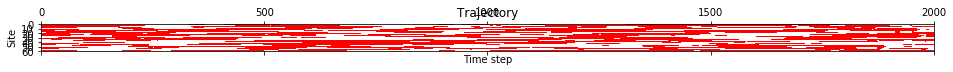

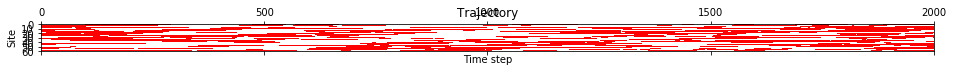

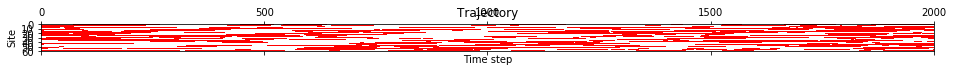

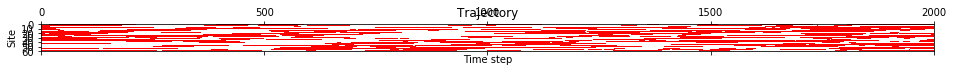

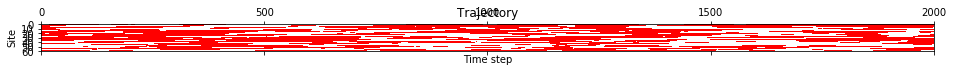

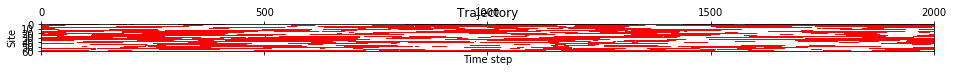

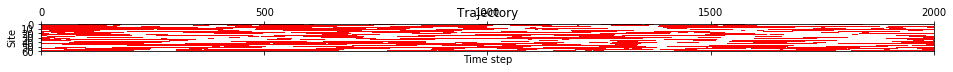

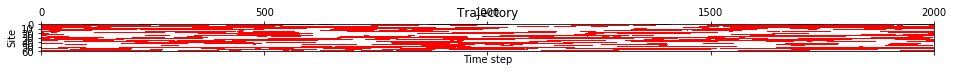

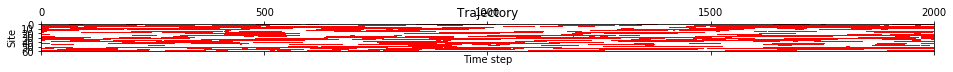

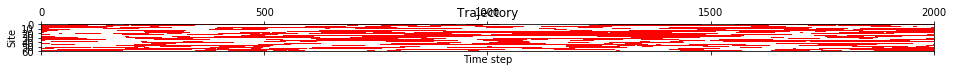

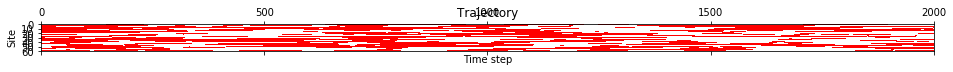

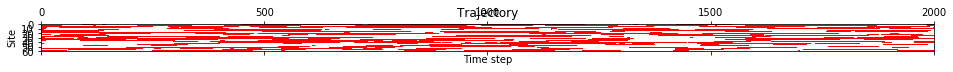

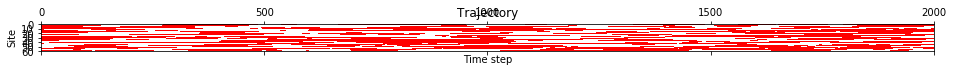

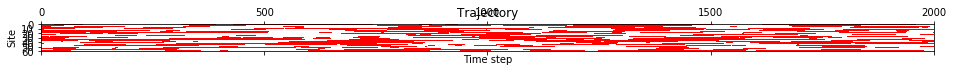

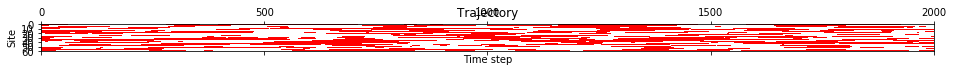

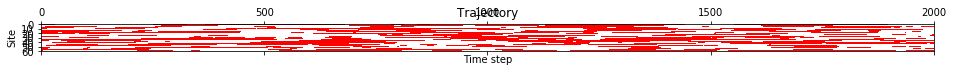

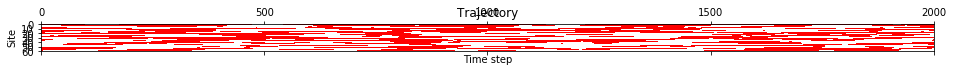

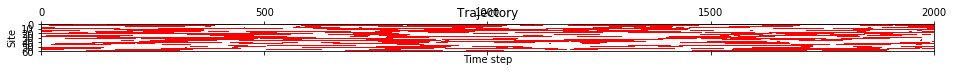

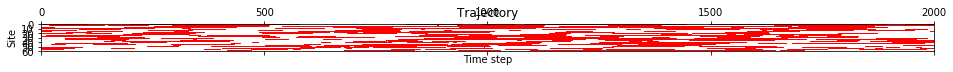

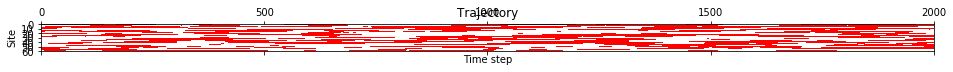

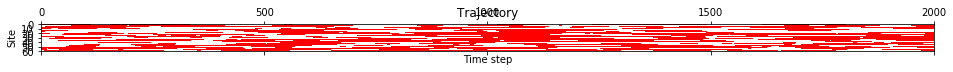

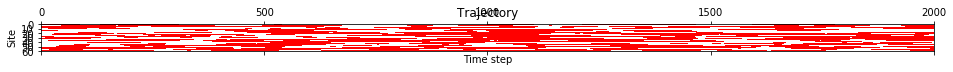

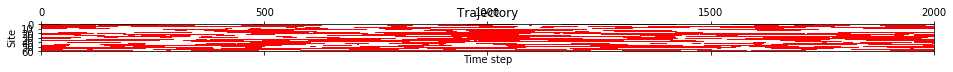

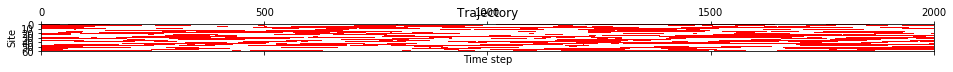

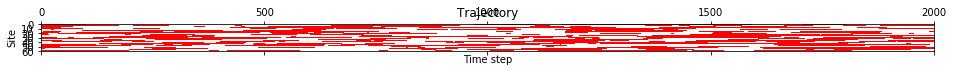

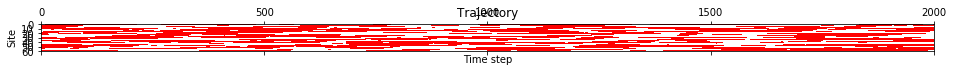

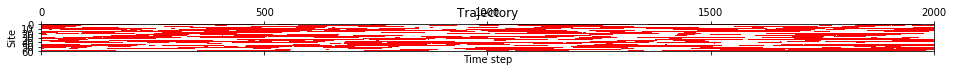

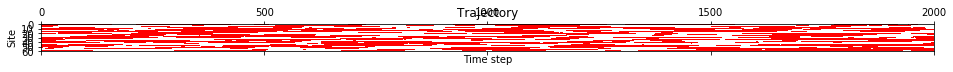

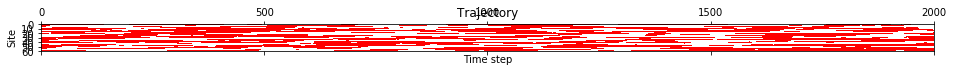

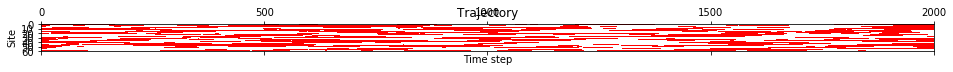

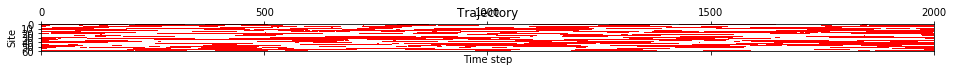

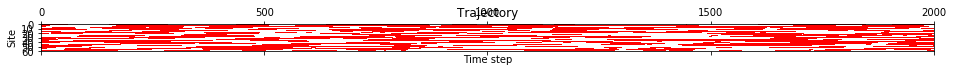

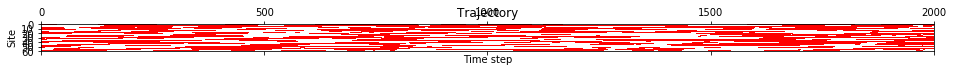

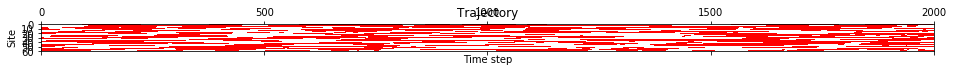

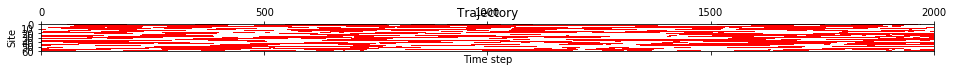

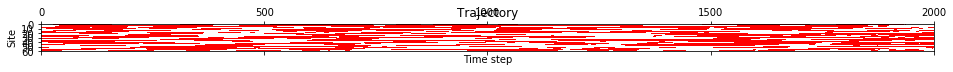

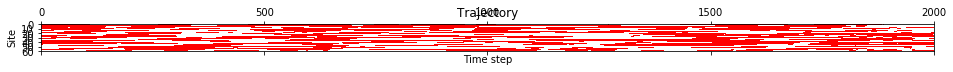

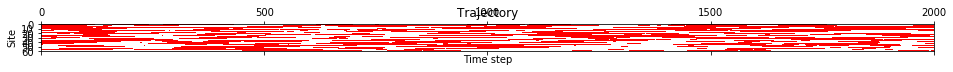

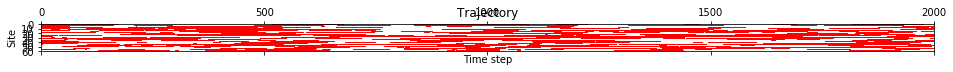

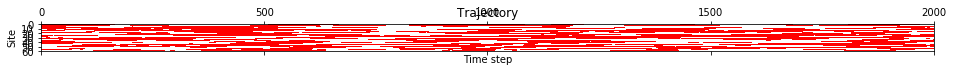

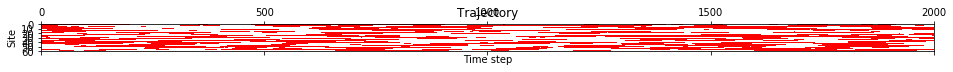

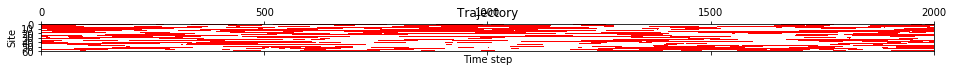

Activity: 0.00772933333333


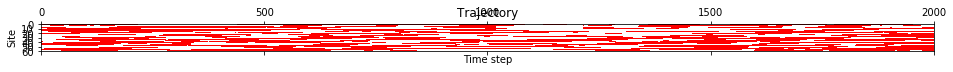

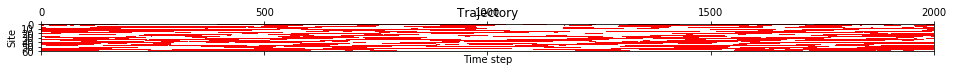

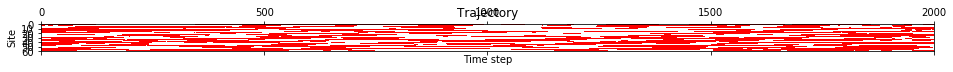

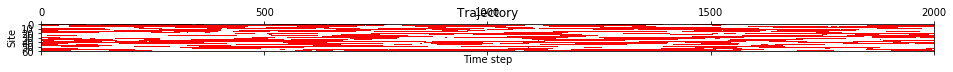

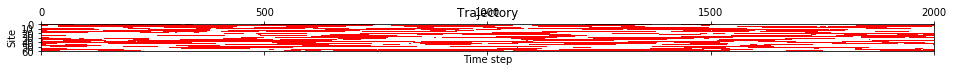

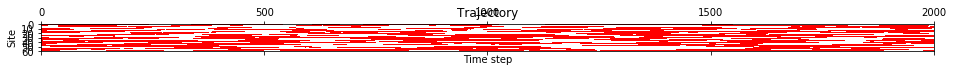

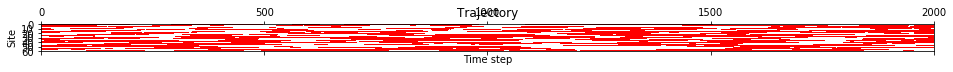

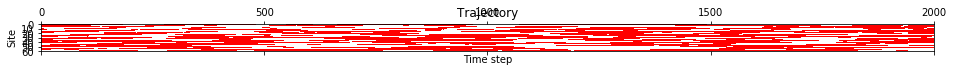

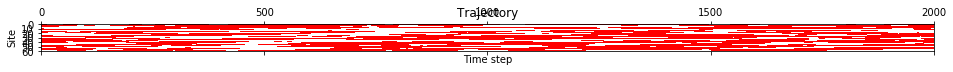

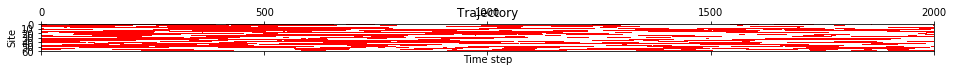

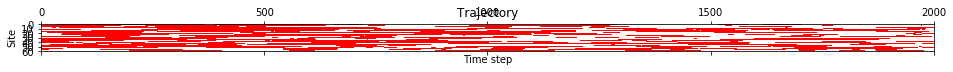

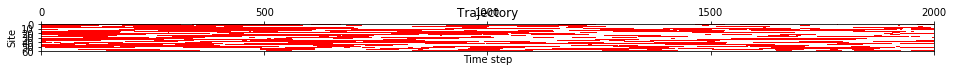

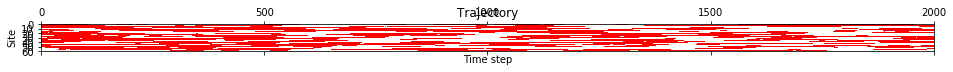

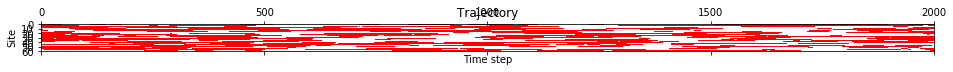

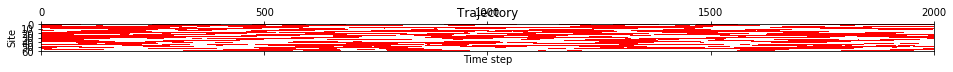

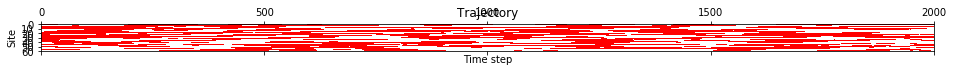

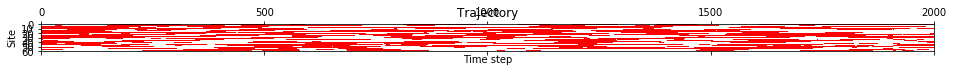

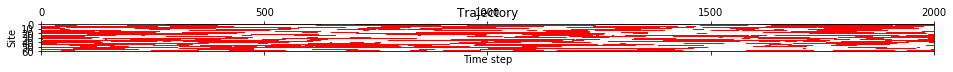

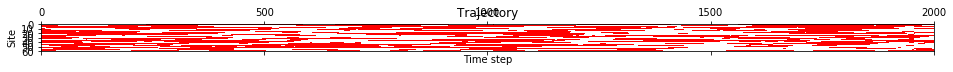

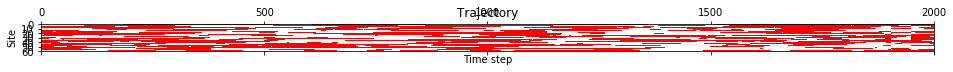

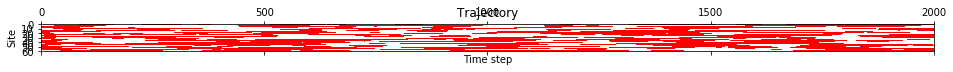

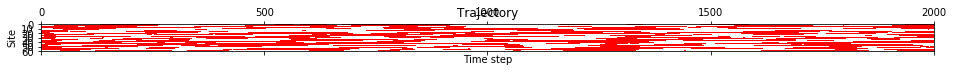

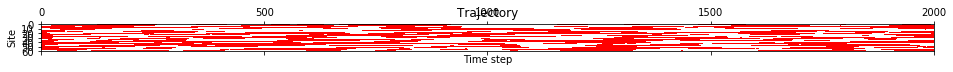

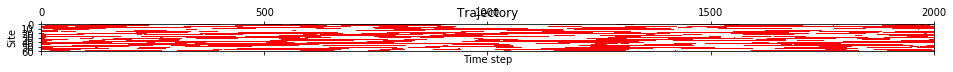

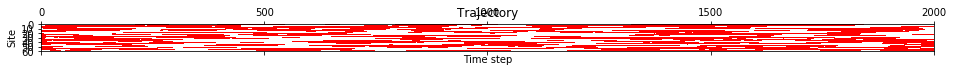

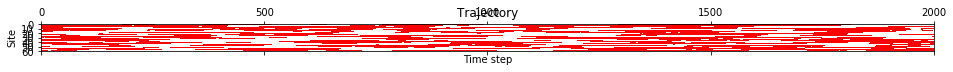

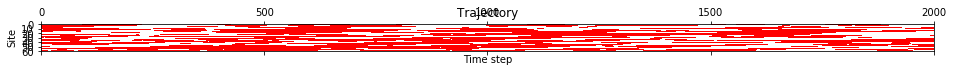

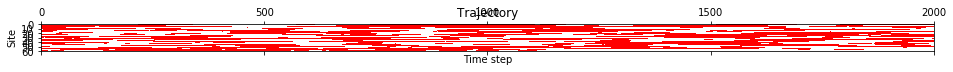

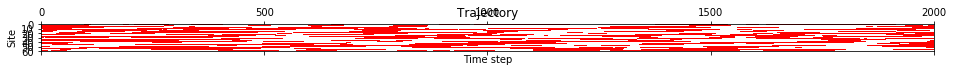

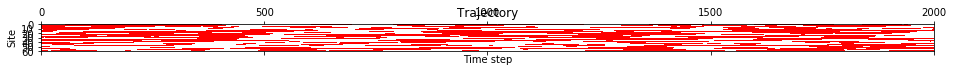

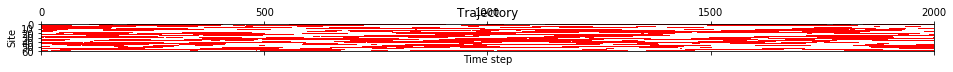

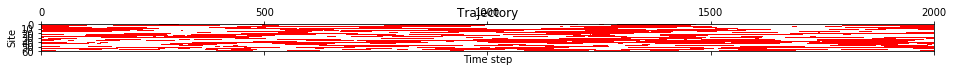

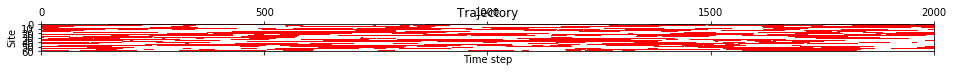

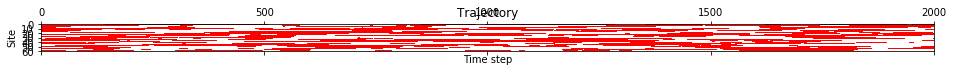

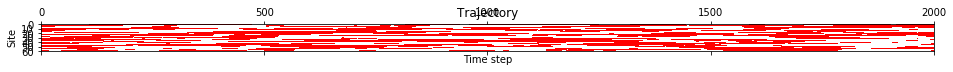

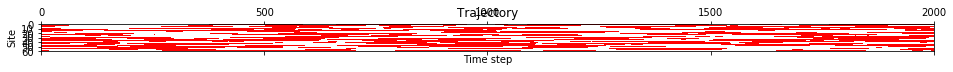

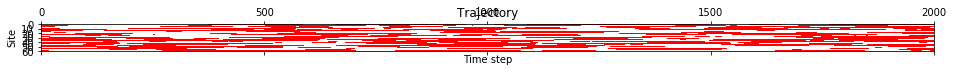

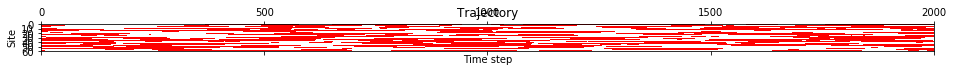

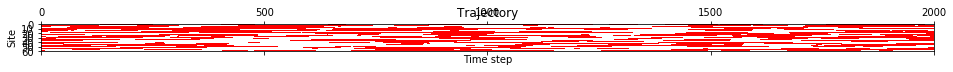

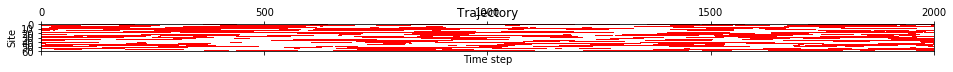

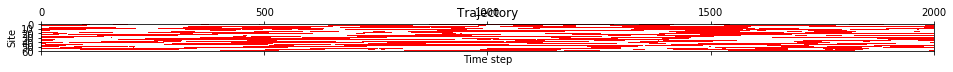

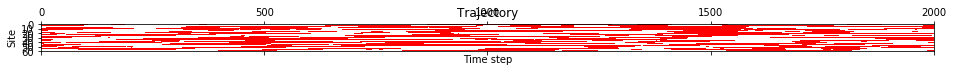

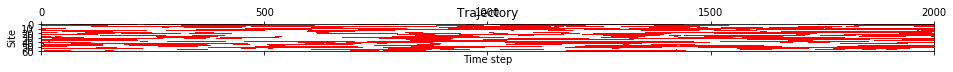

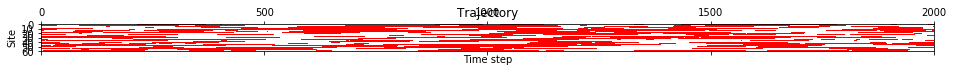

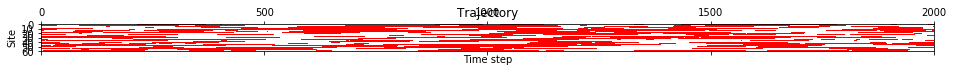

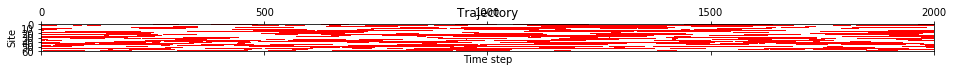

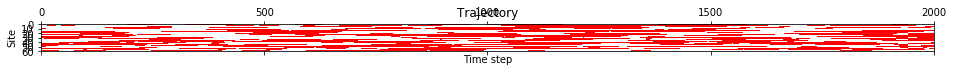

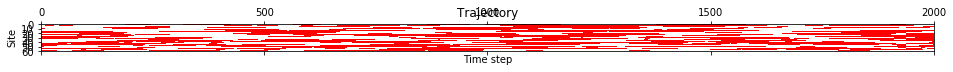

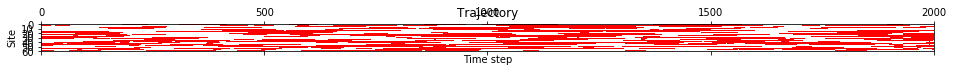

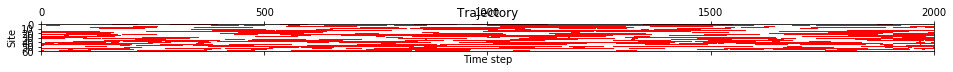

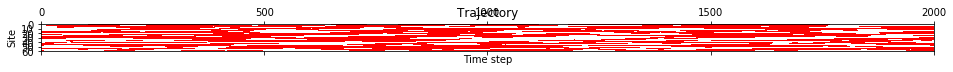

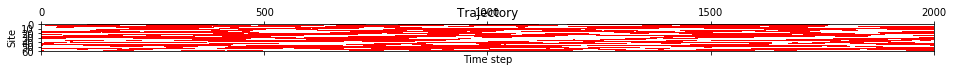

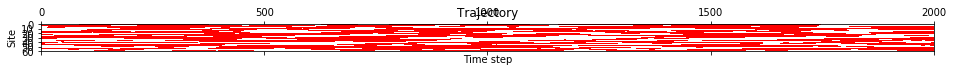

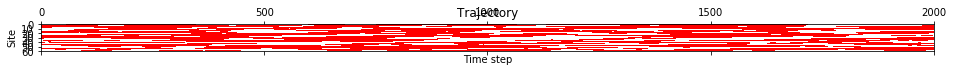

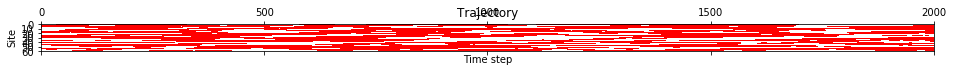

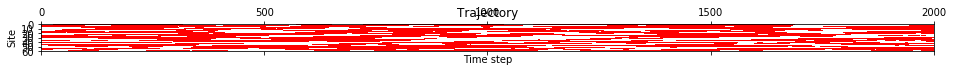

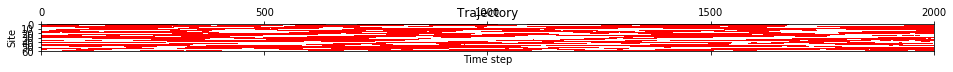

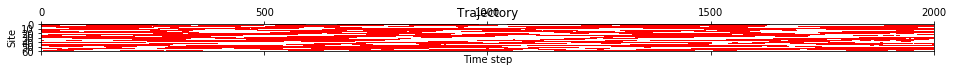

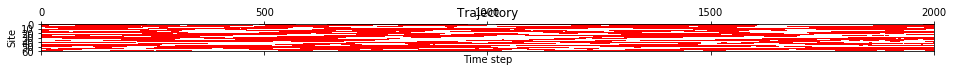

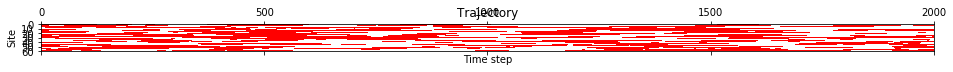

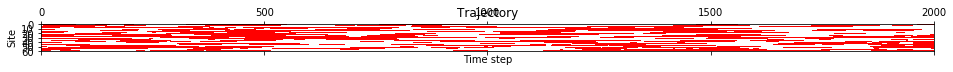

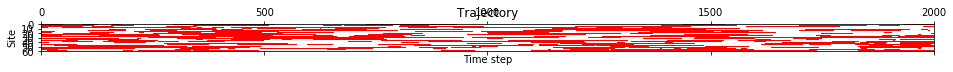

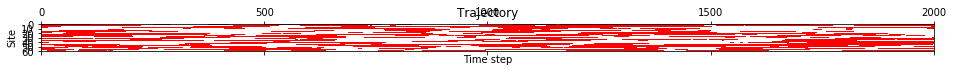

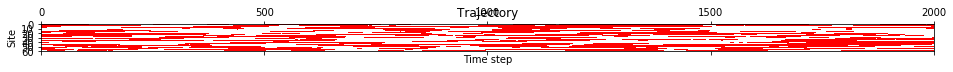

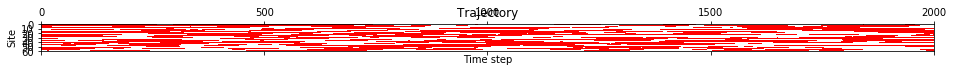

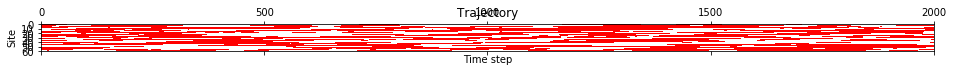

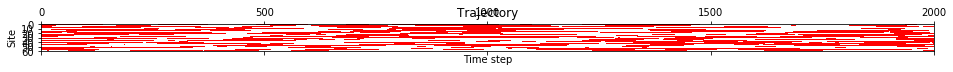

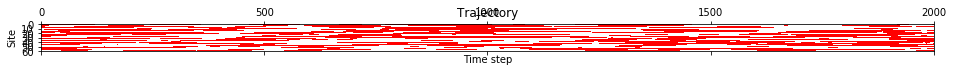

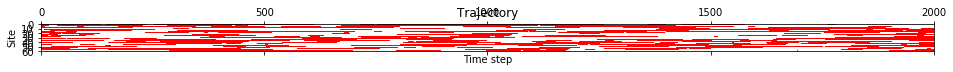

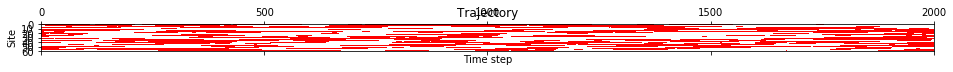

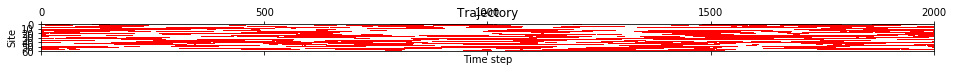

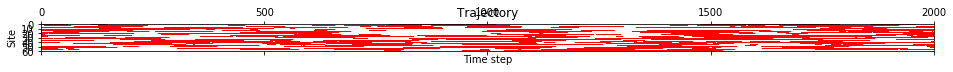

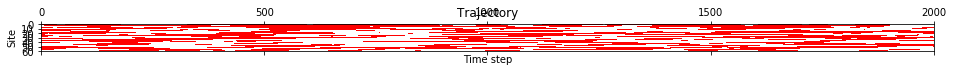

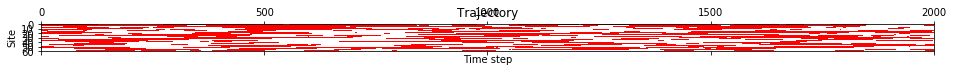

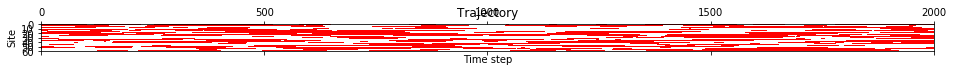

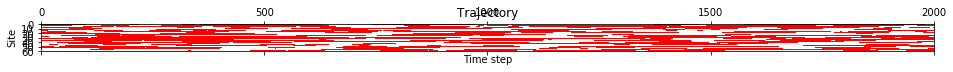

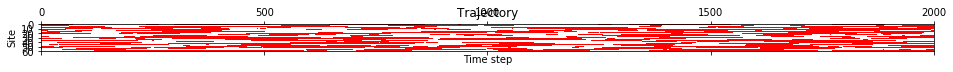

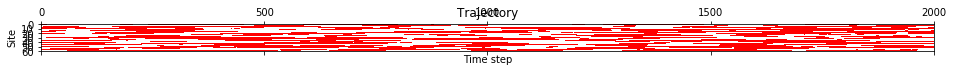

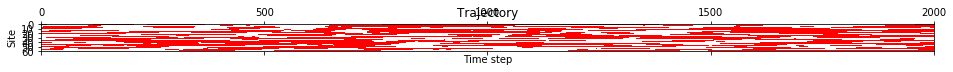

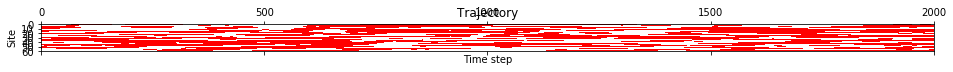

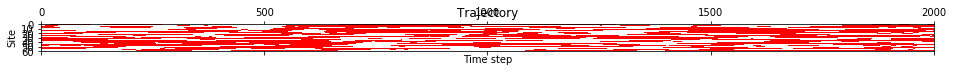

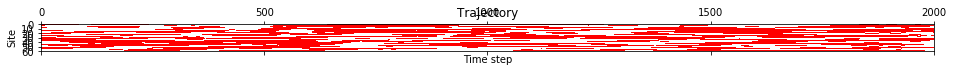

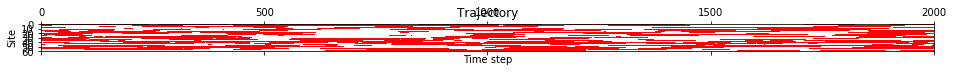

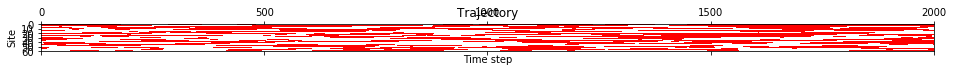

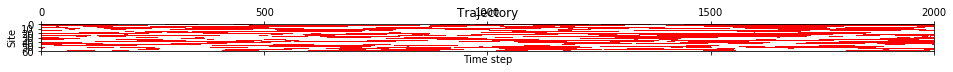

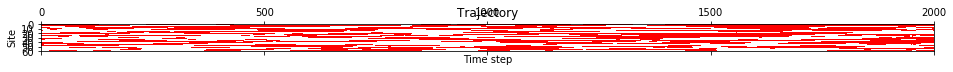

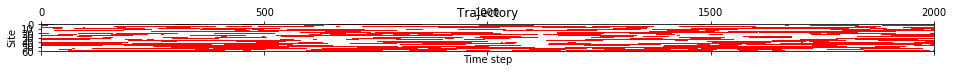

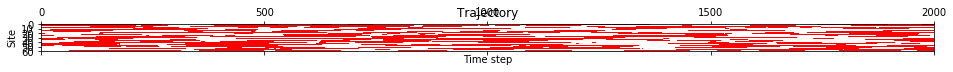

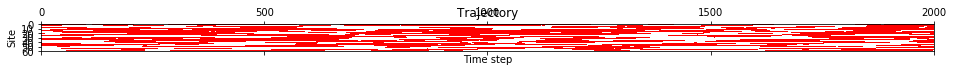

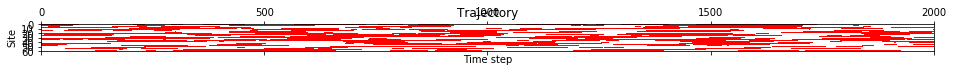

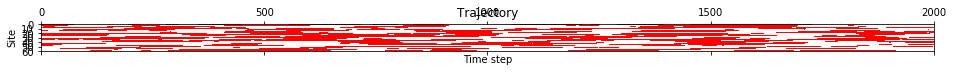

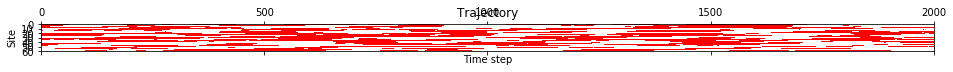

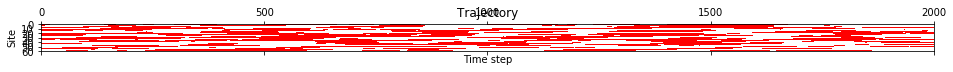

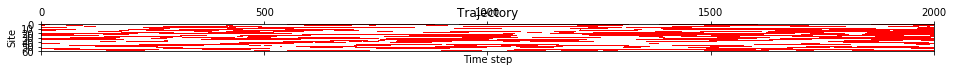

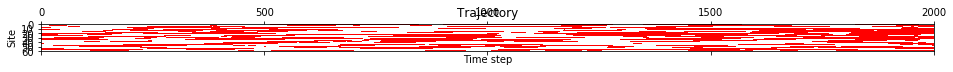

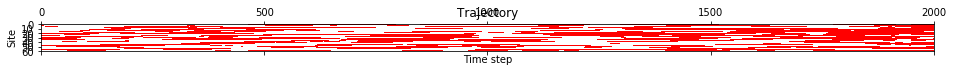

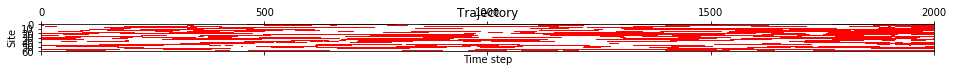

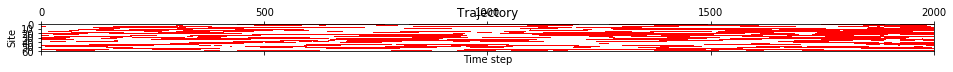

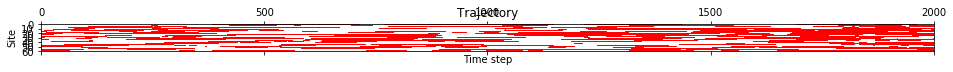

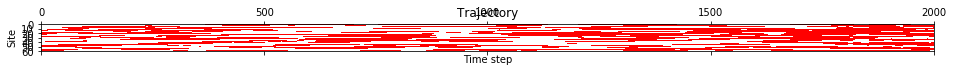

Activity: 0.00734425


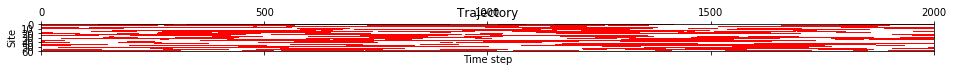

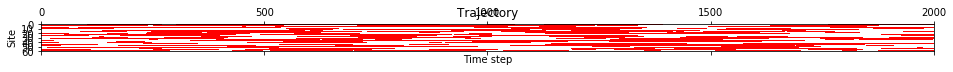

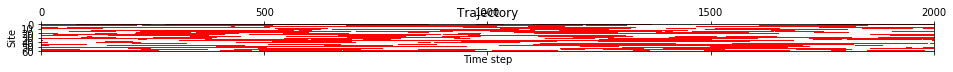

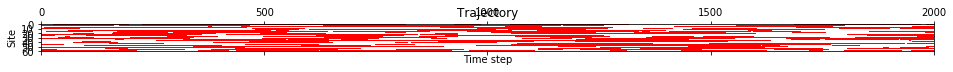

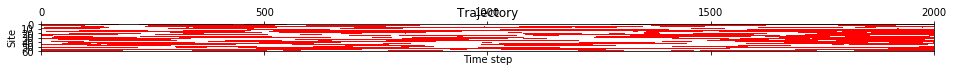

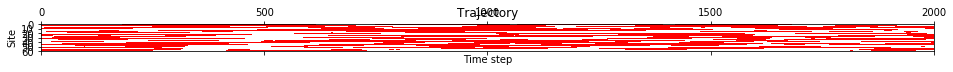

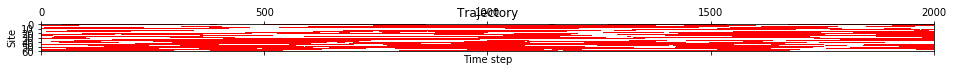

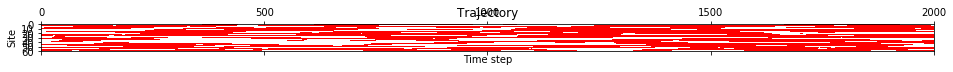

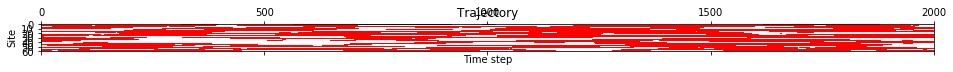

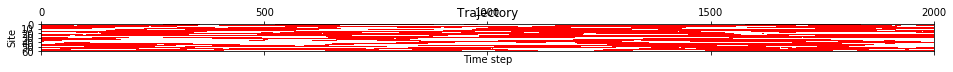

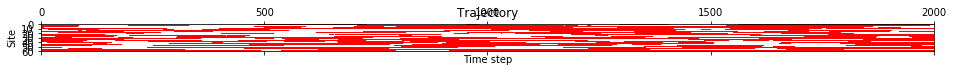

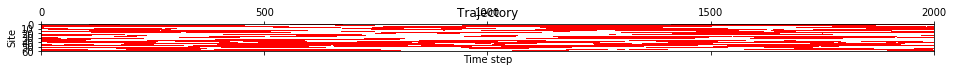

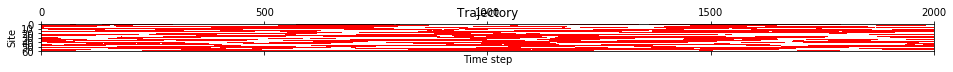

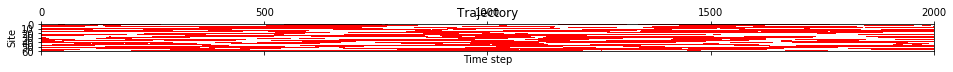

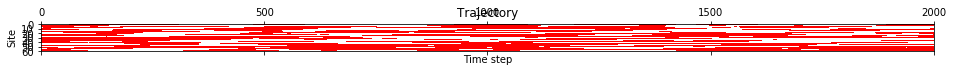

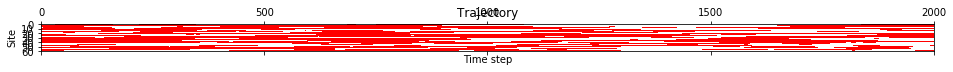

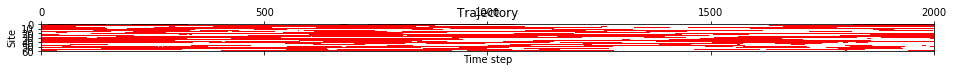

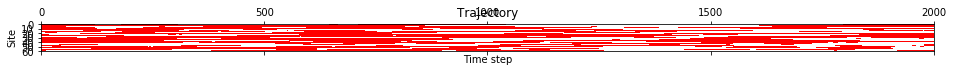

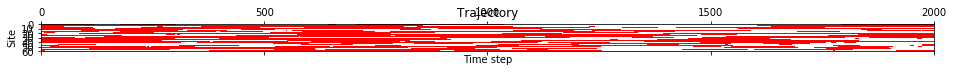

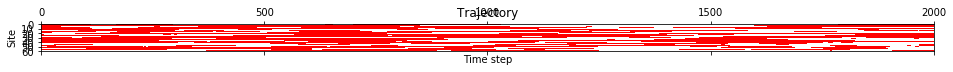

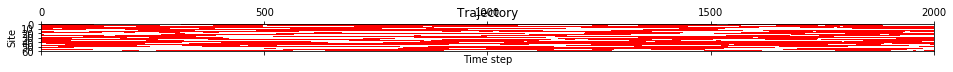

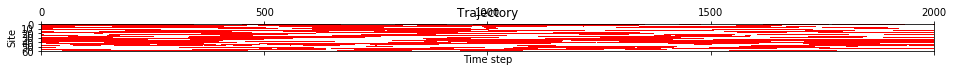

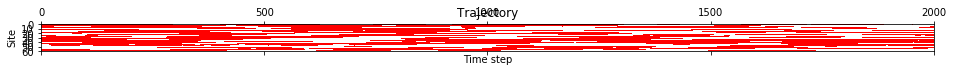

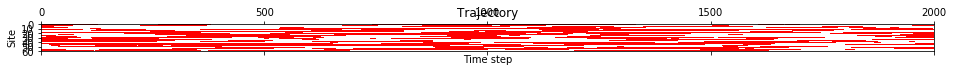

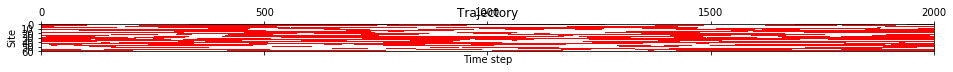

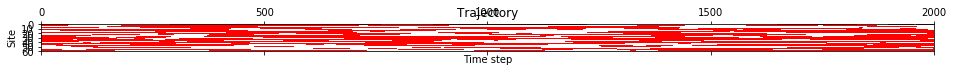

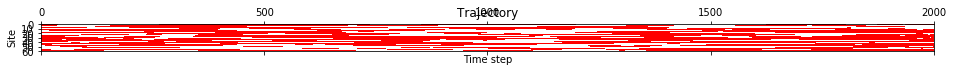

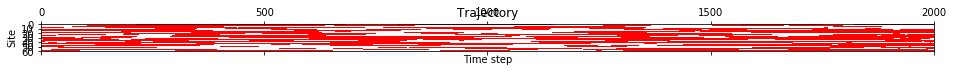

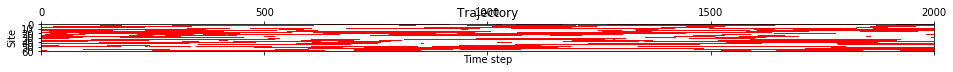

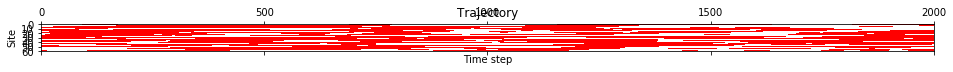

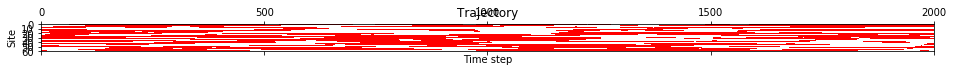

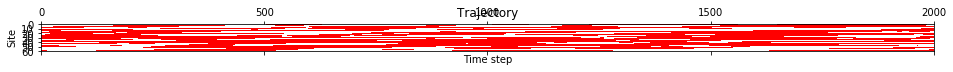

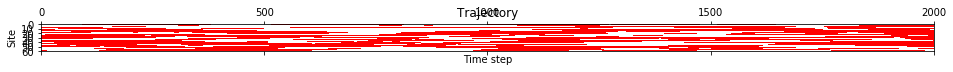

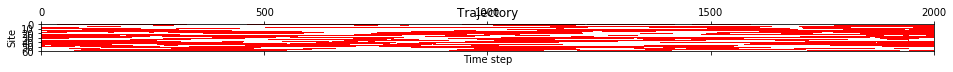

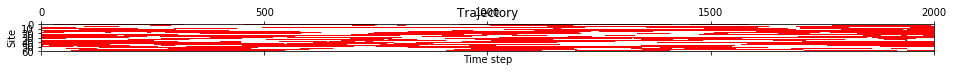

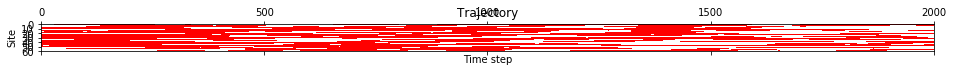

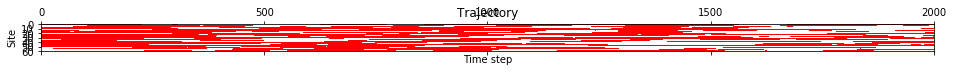

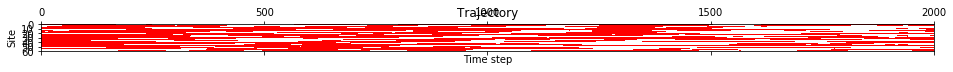

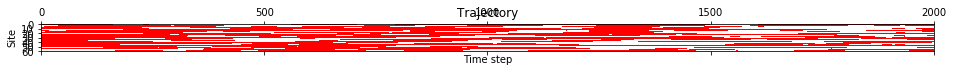

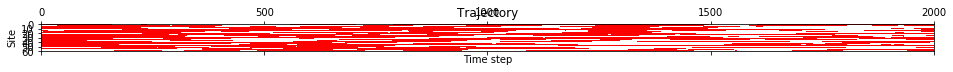

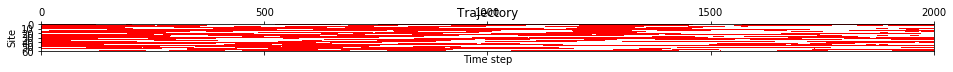

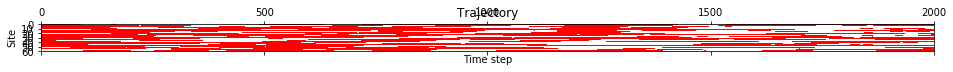

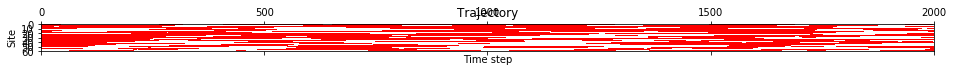

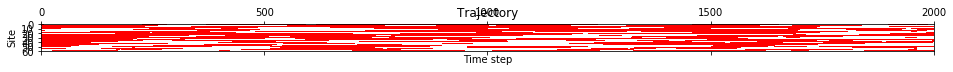

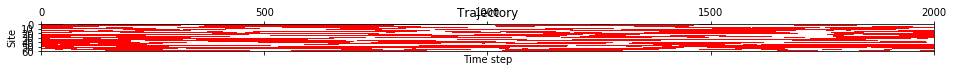

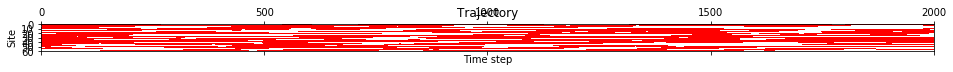

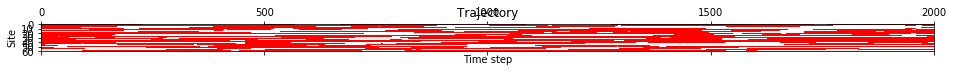

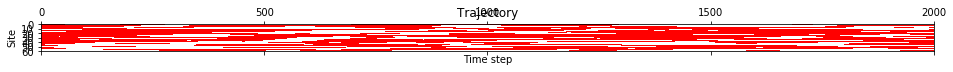

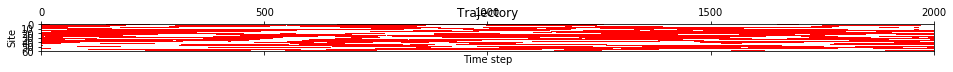

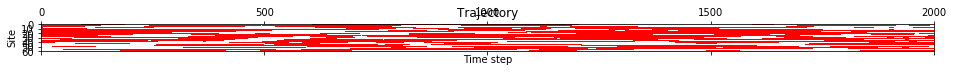

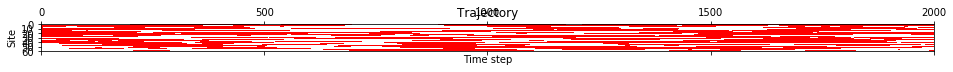

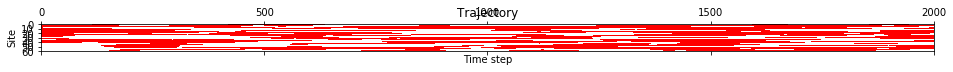

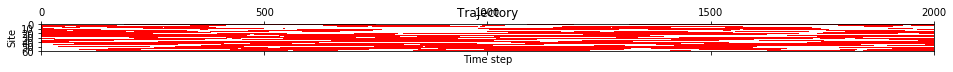

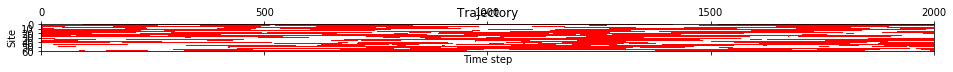

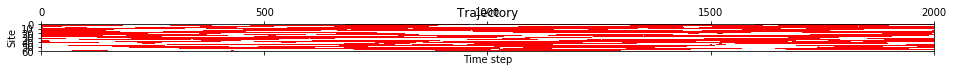

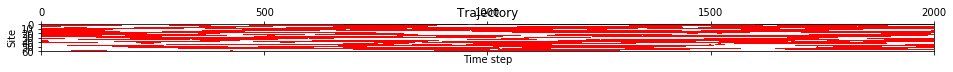

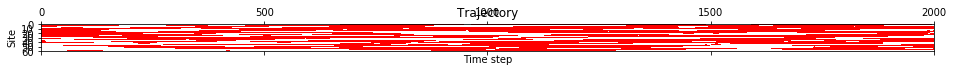

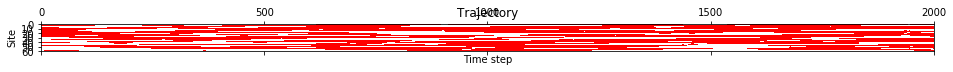

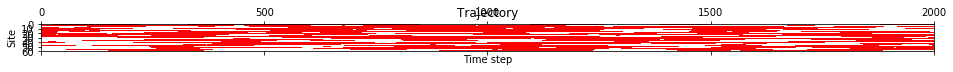

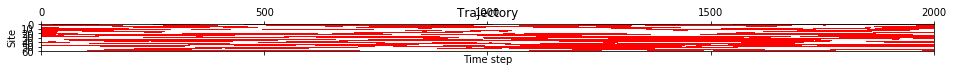

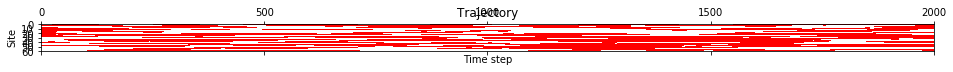

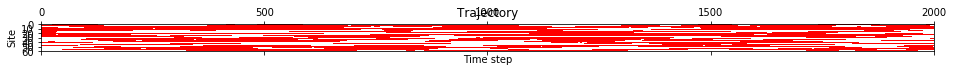

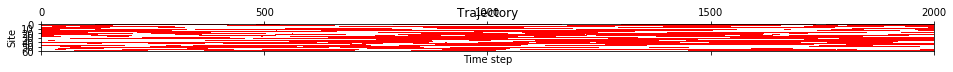

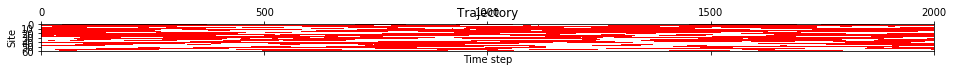

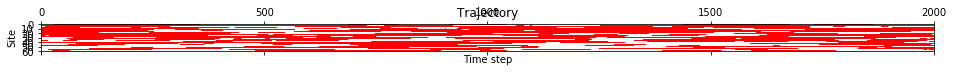

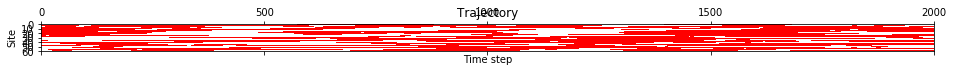

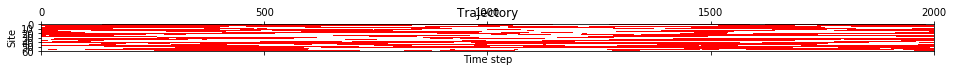

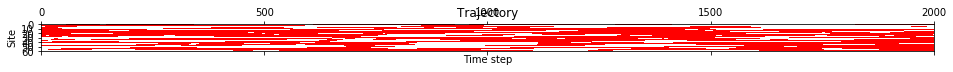

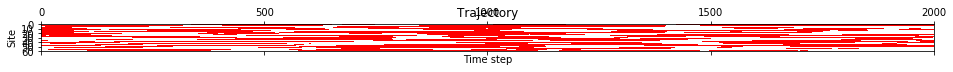

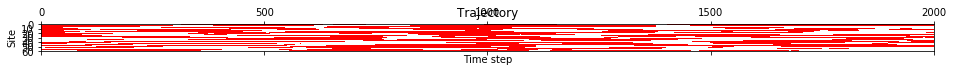

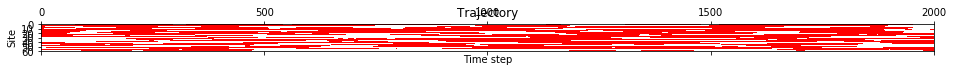

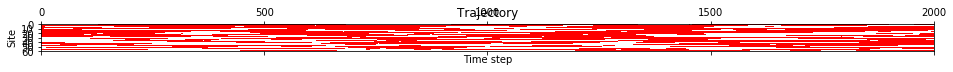

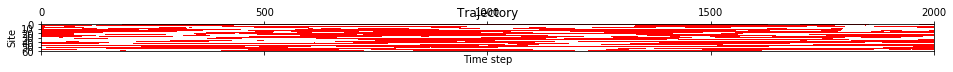

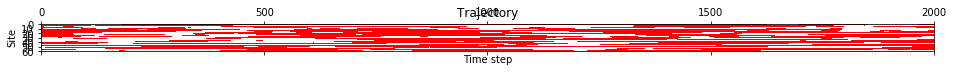

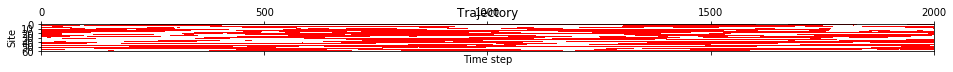

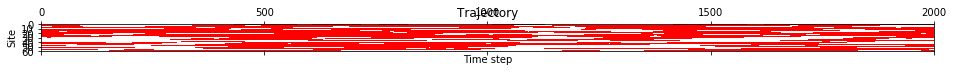

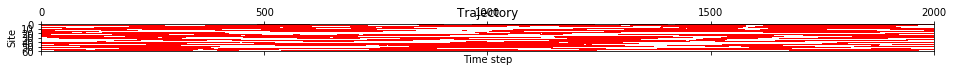

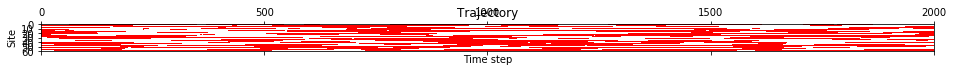

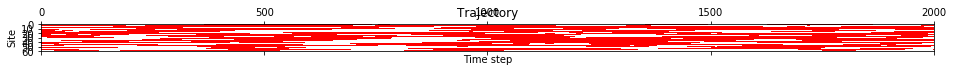

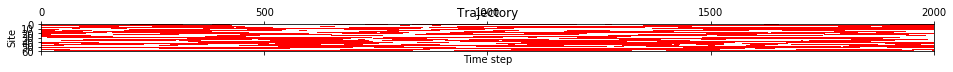

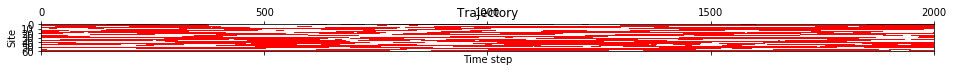

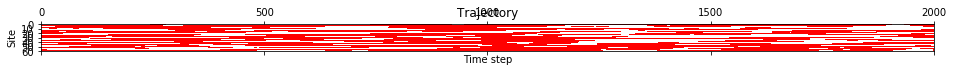

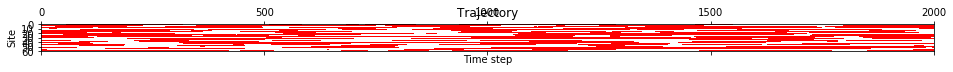

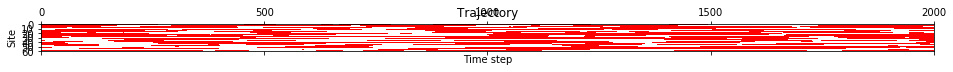

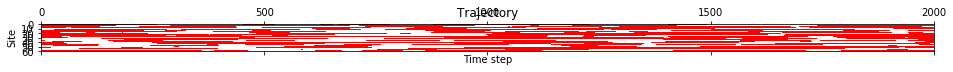

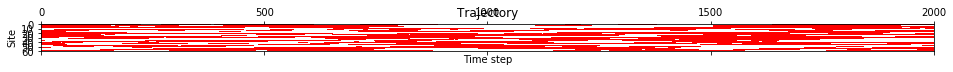

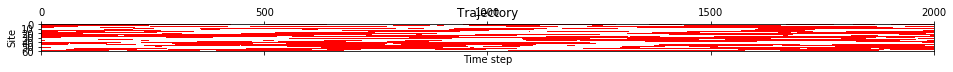

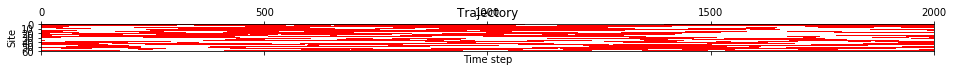

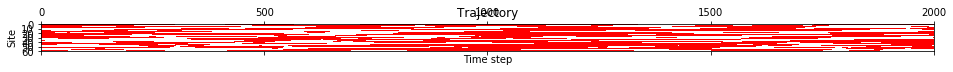

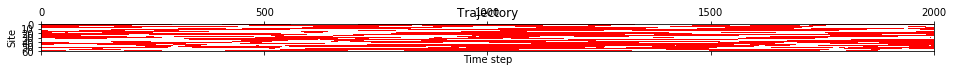

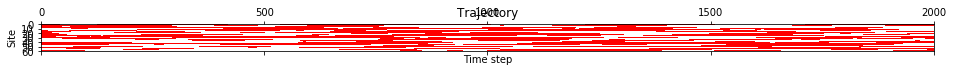

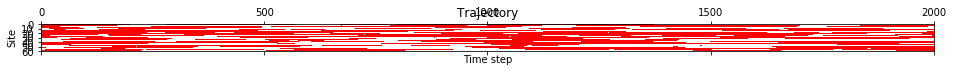

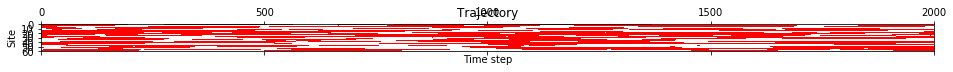

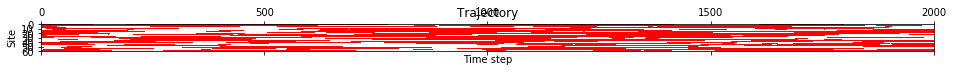

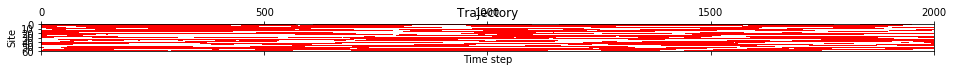

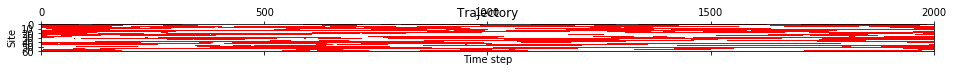

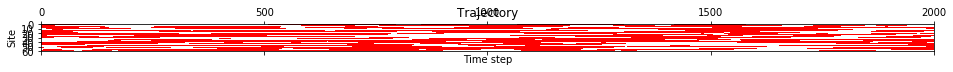

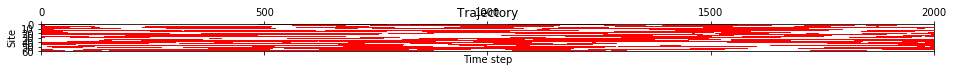

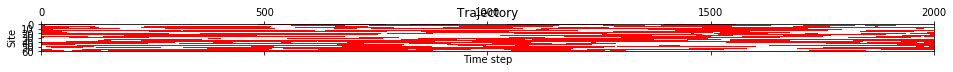

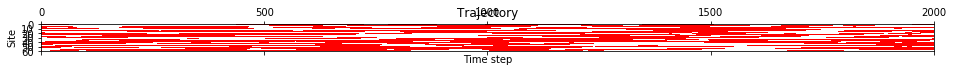

Activity: 0.00470133333333


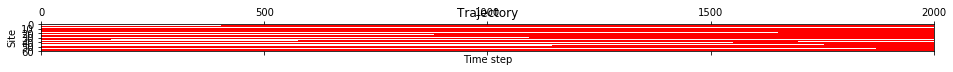

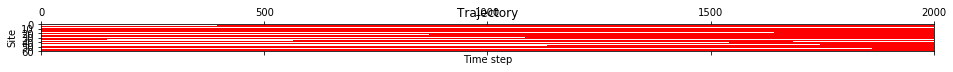

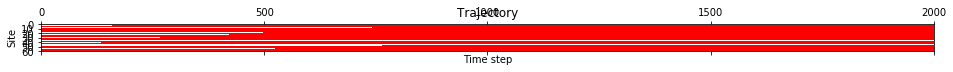

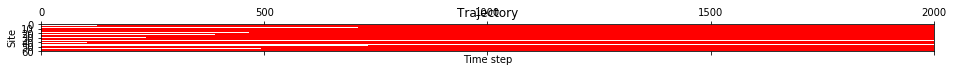

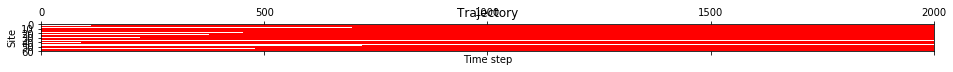

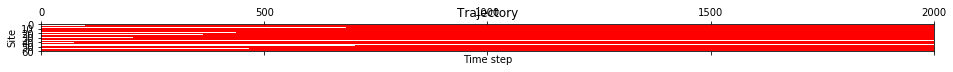

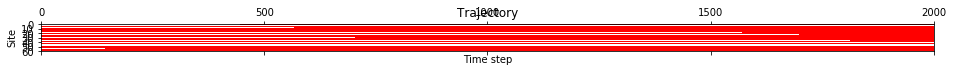

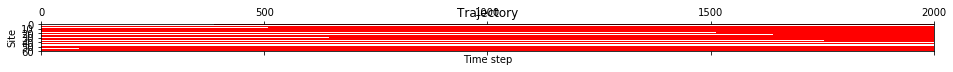

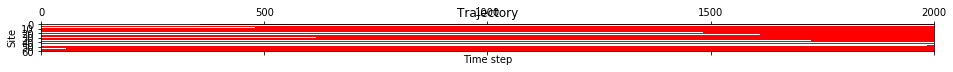

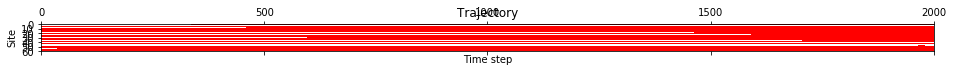

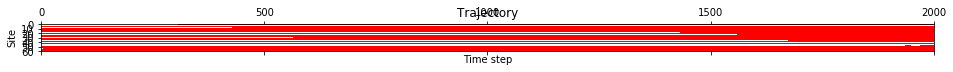

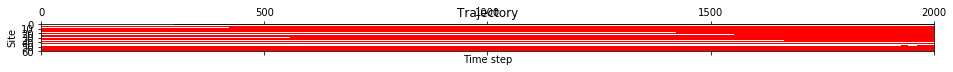

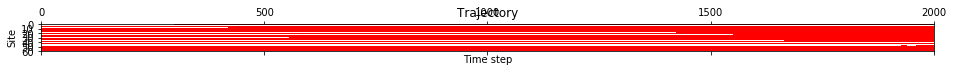

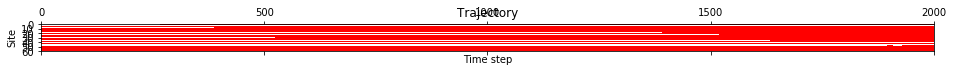

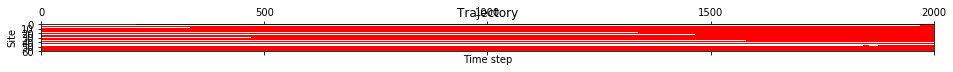

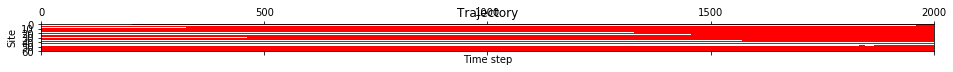

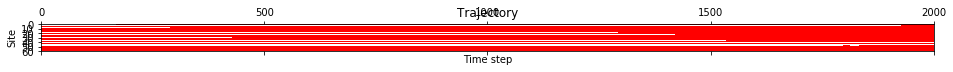

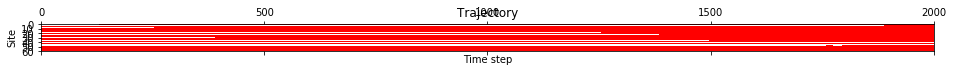

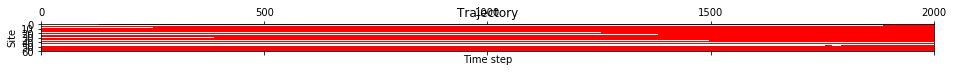

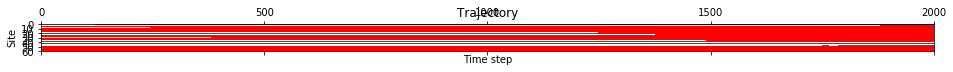

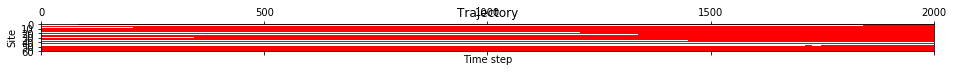

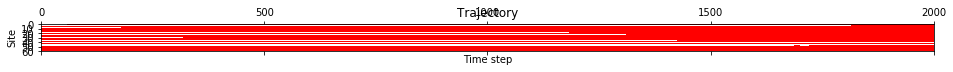

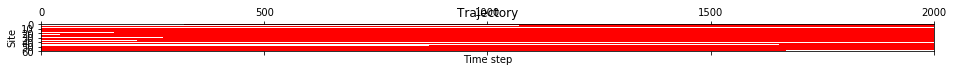

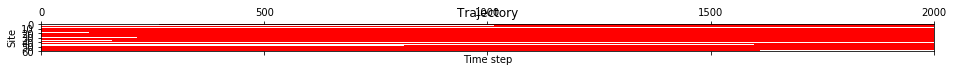

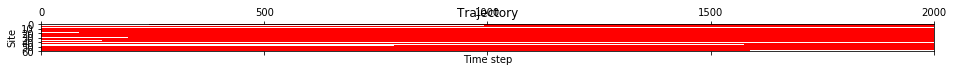

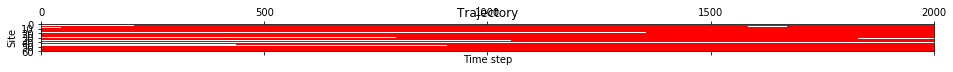

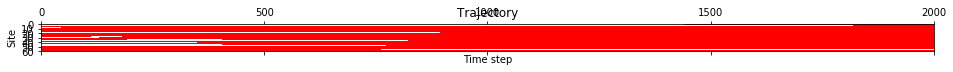

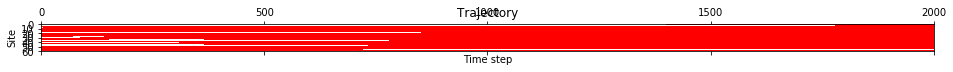

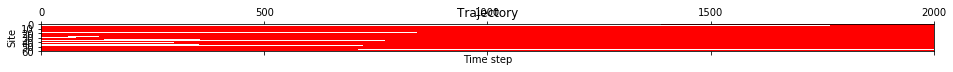

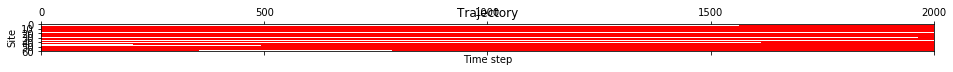

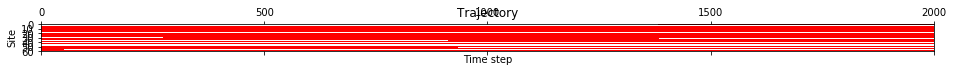

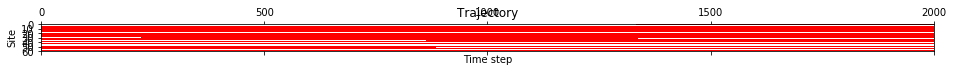

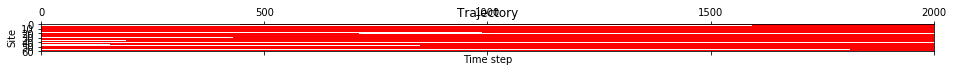

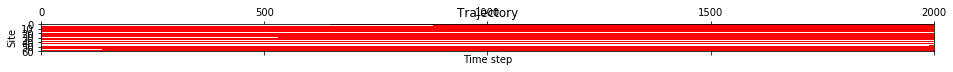

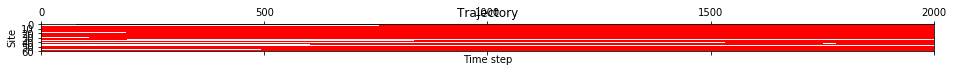

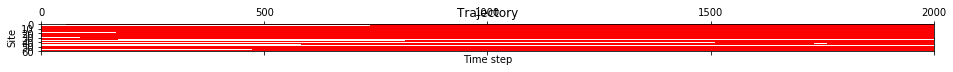

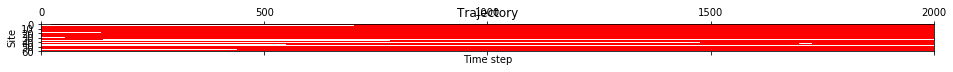

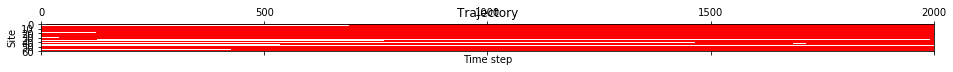

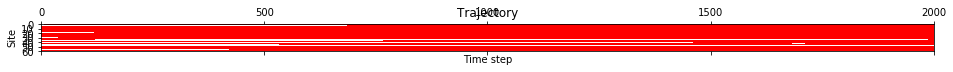

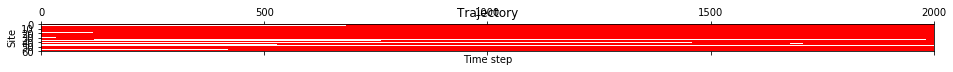

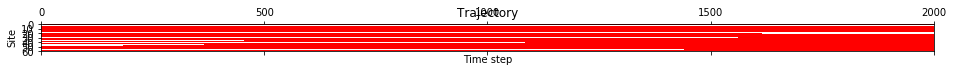

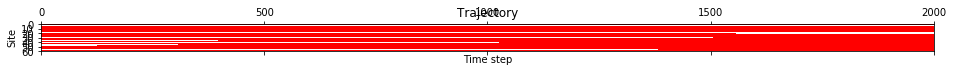

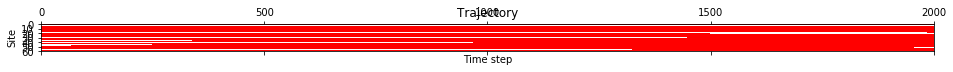

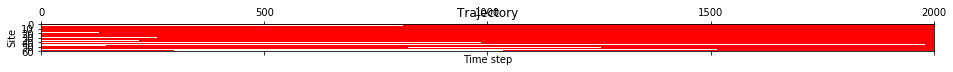

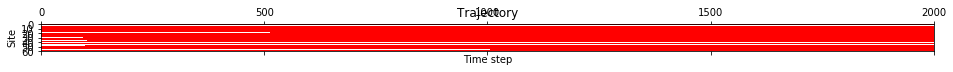

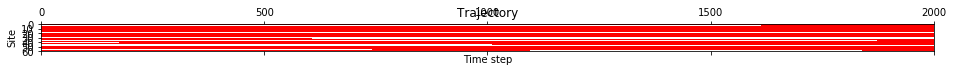

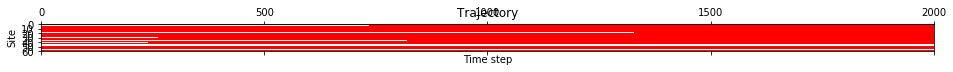

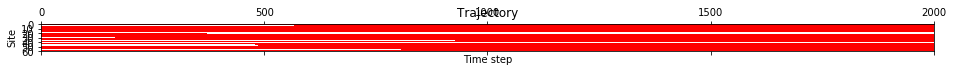

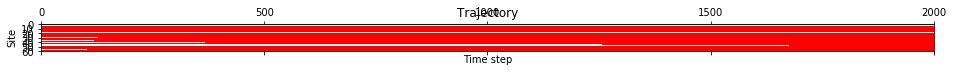

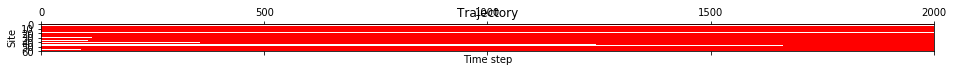

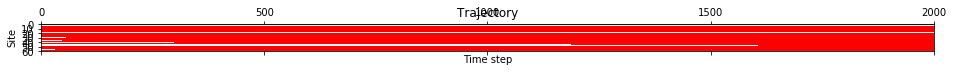

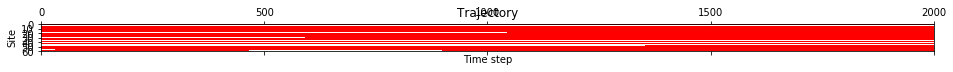

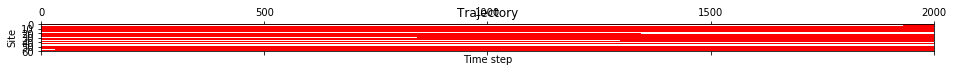

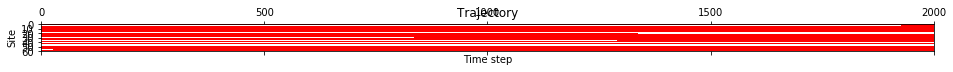

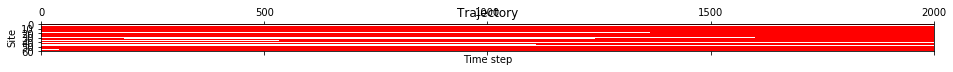

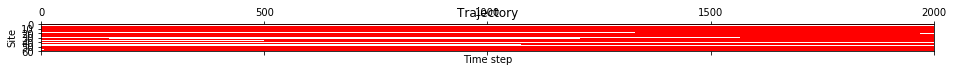

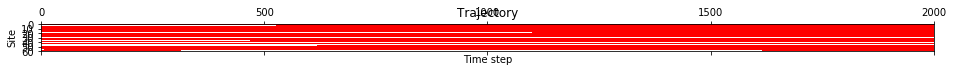

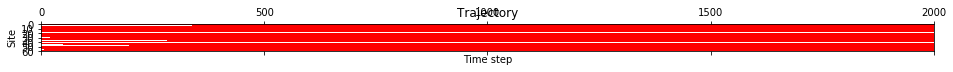

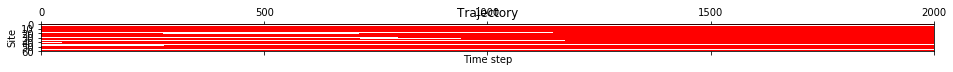

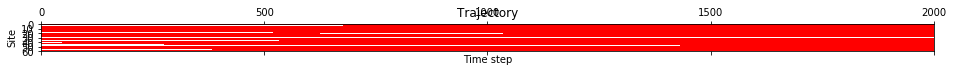

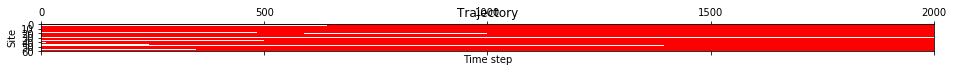

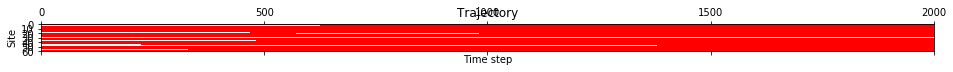

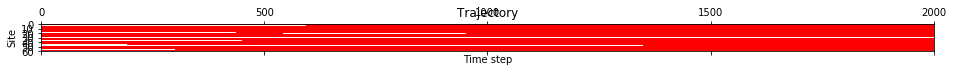

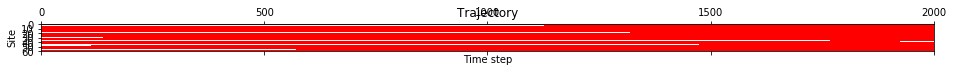

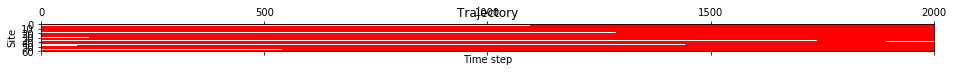

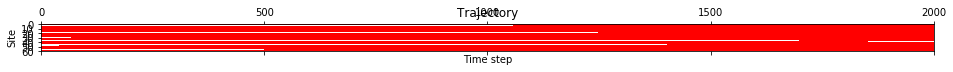

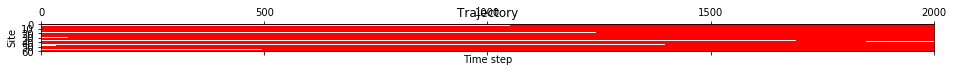

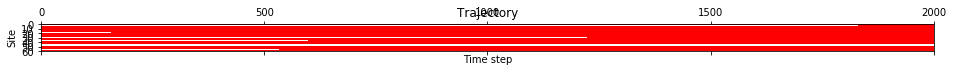

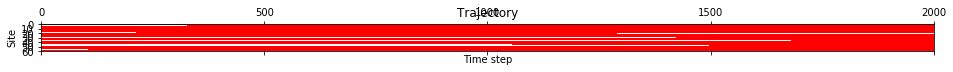

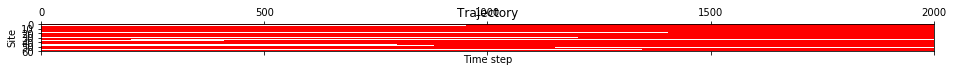

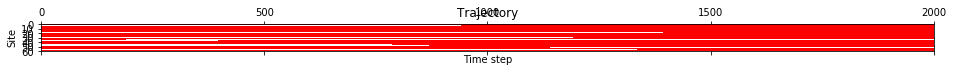

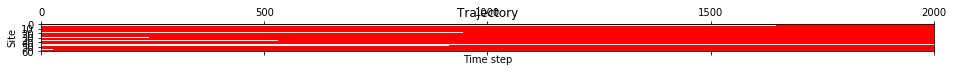

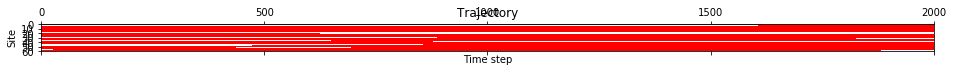

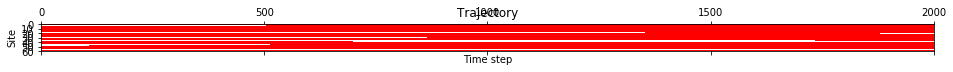

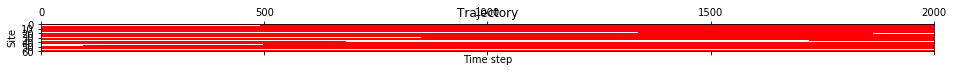

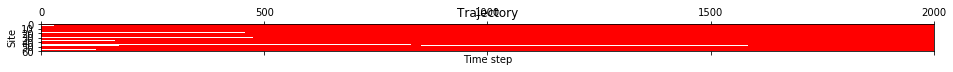

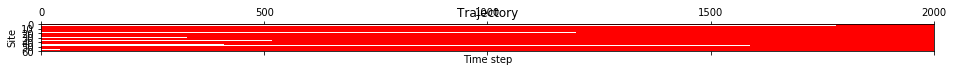

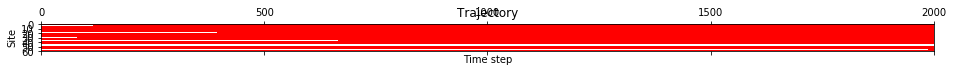

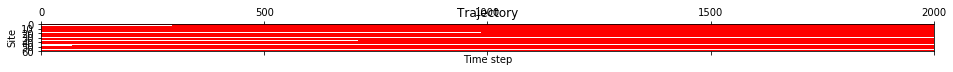

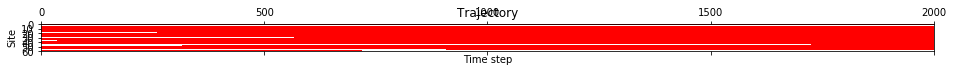

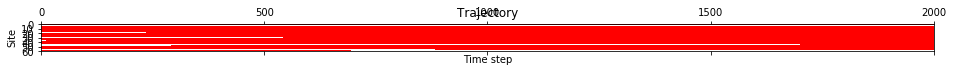

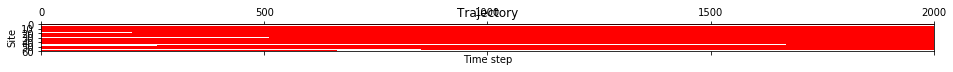

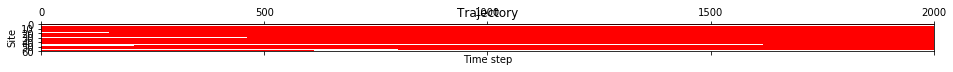

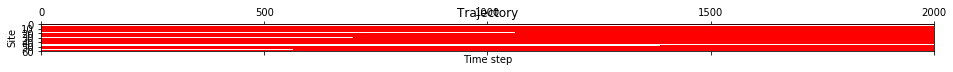

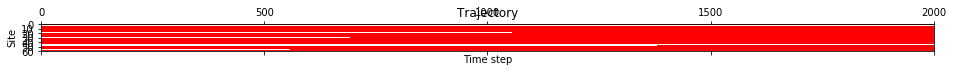

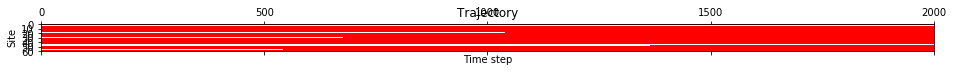

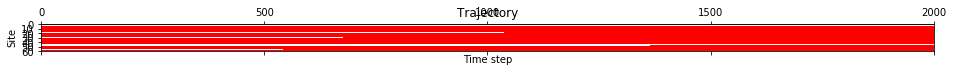

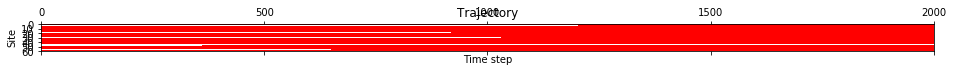

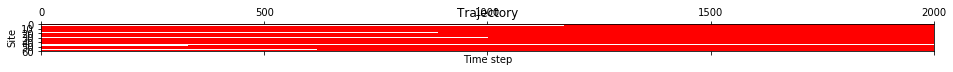

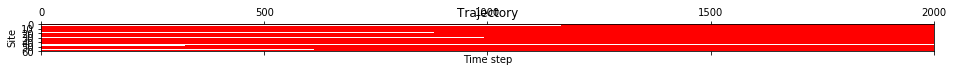

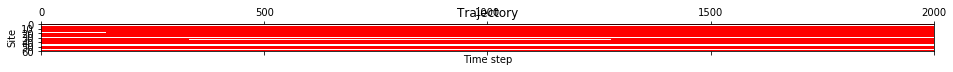

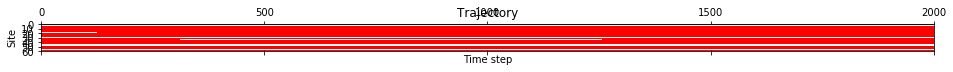

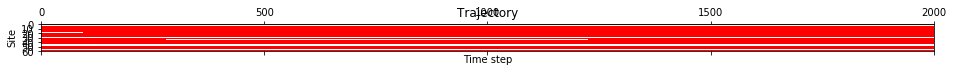

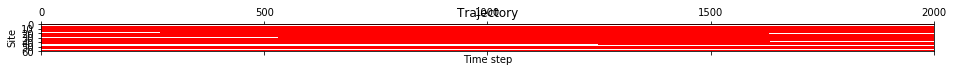

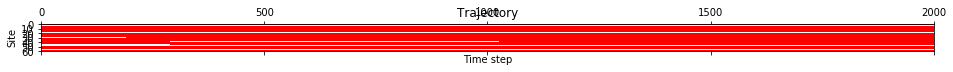

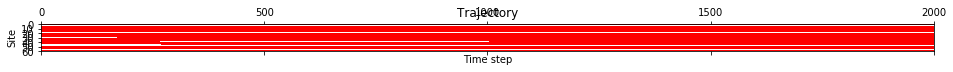

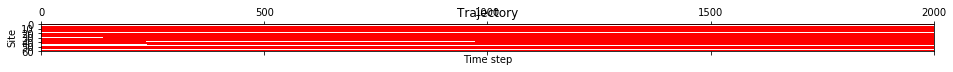

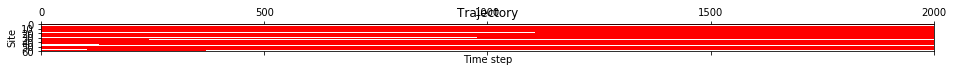

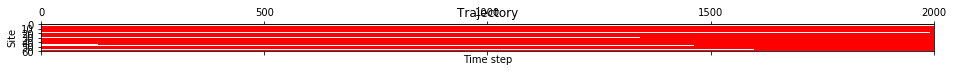

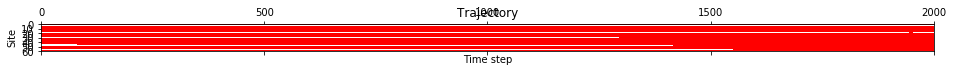

Activity: 0.0001405


In [5]:
for eps in epsilons:
    logging.info("Softening parameter, \epsilon: {}".format(eps))
    fa_kcm = SoftenedFA(gamma=0.25, eps=eps, s=0.01,num_burnin_steps=500, num_sites=60, num_steps=2000)
    tps = SoftenedFATPS(fa_kcm, fa_kcm.activity)
    trajectory = fa_kcm.gen_trajectory()
    print("Activity: {}".format(tps.mc_average(100, verbose=True)))

In [6]:
for prob_transition in np.arange(0,1,0.1):
    fa_kcm = EastKCM(prob_transition=prob_transition, num_burnin_steps=500, num_sites=60, num_steps=600)
    tps = SoftenedFATPS(fa_kcm, fa_kcm.activity)
    trajectory = fa_kcm.gen_trajectory()
    print("Prob transition: {}; Activity: {}".format(prob_transition, tps.mc_average(100)))

AttributeError: 'EastKCM' object has no attribute 's'